In [67]:
# @title Rainfall Prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stat

In [68]:
df = pd.read_csv("/content/weatherAUS.csv")
pd.set_option("display.max_columns", None)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [69]:
df.shape

(145460, 23)

In [70]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) < 25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete Features Count {}".format(len(discrete_feature)))
print("Continuous Features Count {}".format(len(continuous_feature)))
print("Categorical Features Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete Features Count 2
Continuous Features Count 14
Categorical Features Count 7


In [71]:
print(numerical_feature)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [72]:
print(discrete_feature)

['Cloud9am', 'Cloud3pm']


In [73]:
# @title Handling Missing Values
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [74]:
df.dropna(inplace=True)

In [75]:
# @title Using Random sample imputation for handling missing values of features 'Evaporation' and 'Sunshine'
def randomsampleimputation(df,feature):
    df[feature] = df[feature]
    random_sample = df[feature].dropna().sample(df[feature].isnull().sum(), random_state = 0)
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

In [76]:
randomsampleimputation(df, "Evaporation")
randomsampleimputation(df, "Sunshine")

In [77]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [78]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


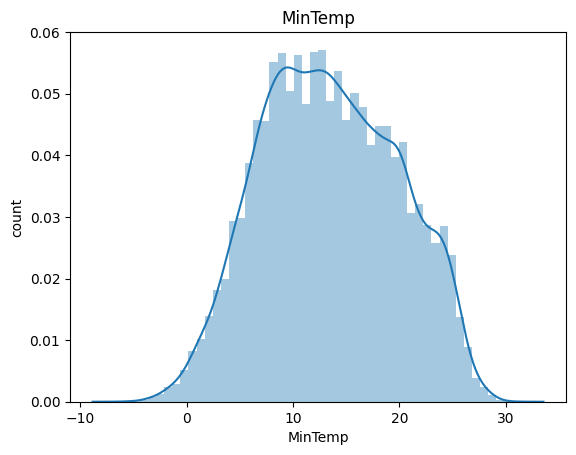

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


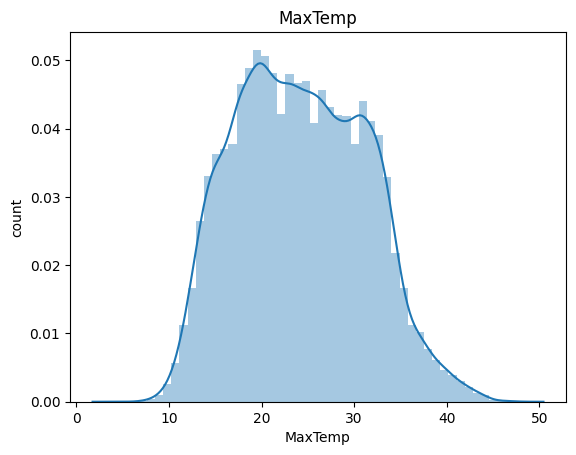

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


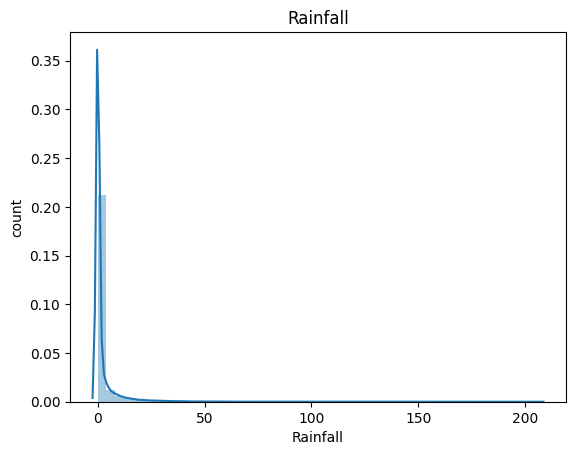

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


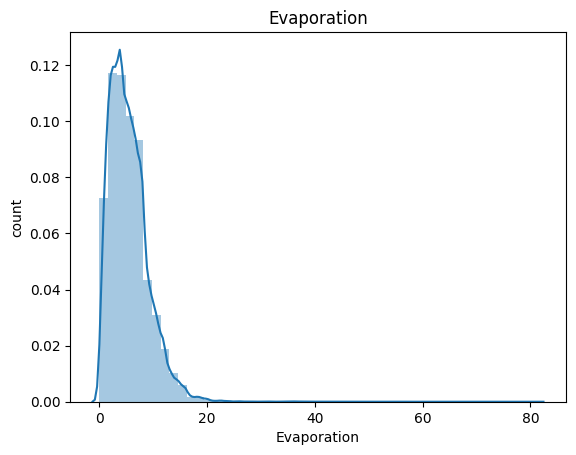

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


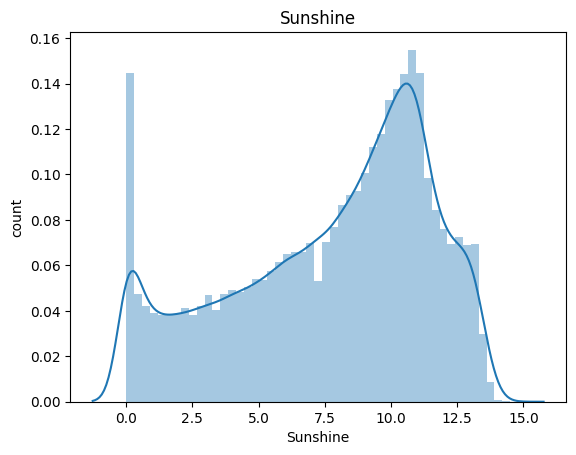

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


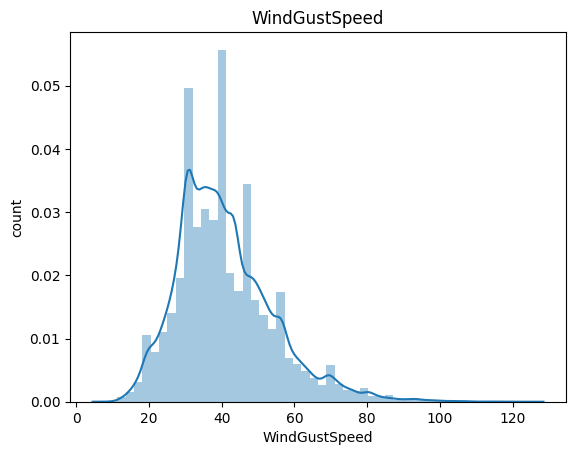

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


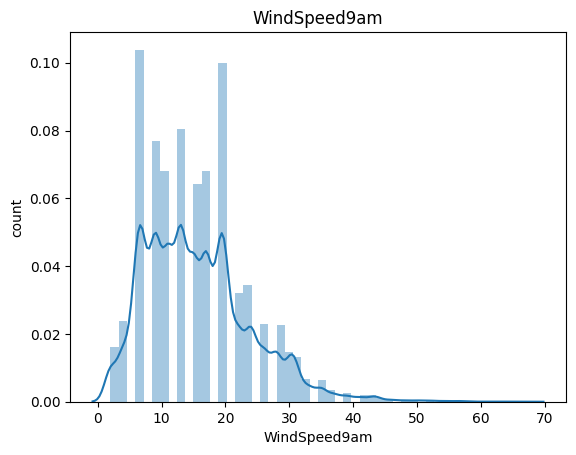

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


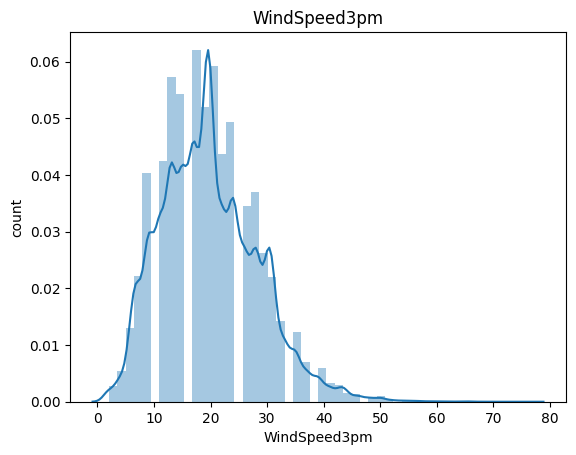

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


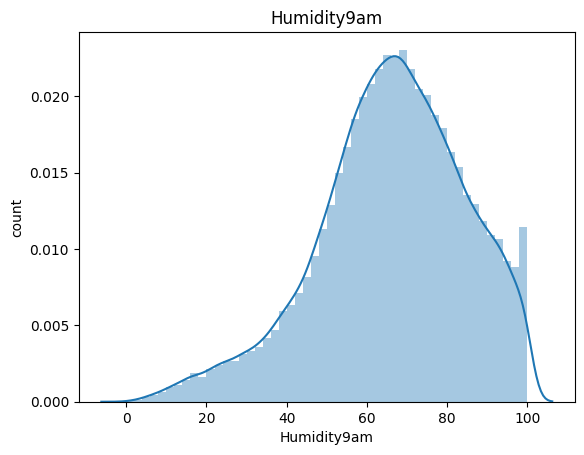

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


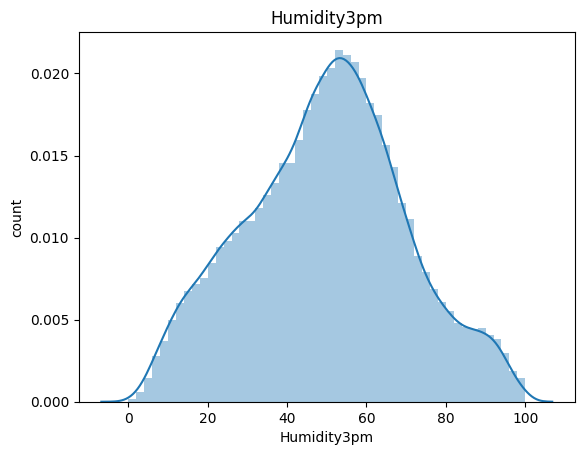

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


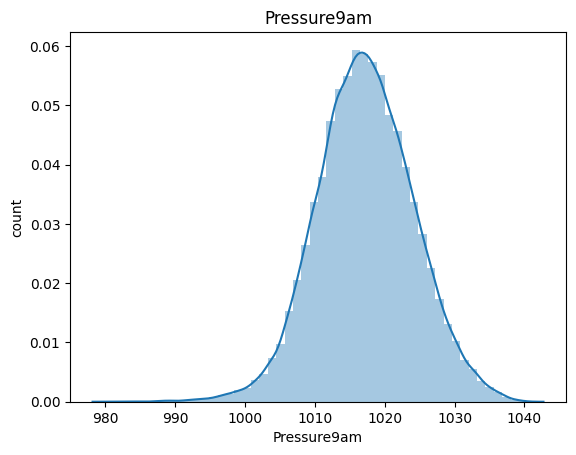

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


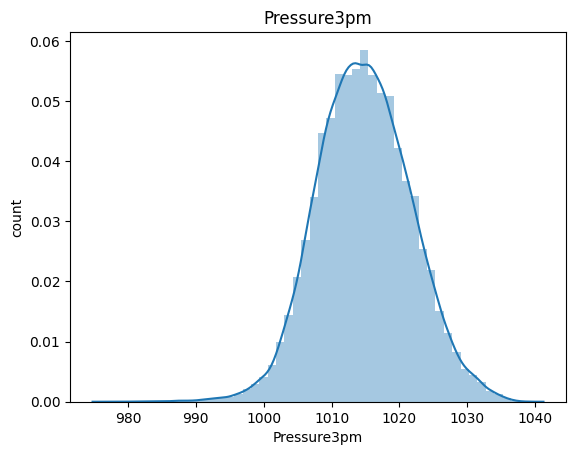

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


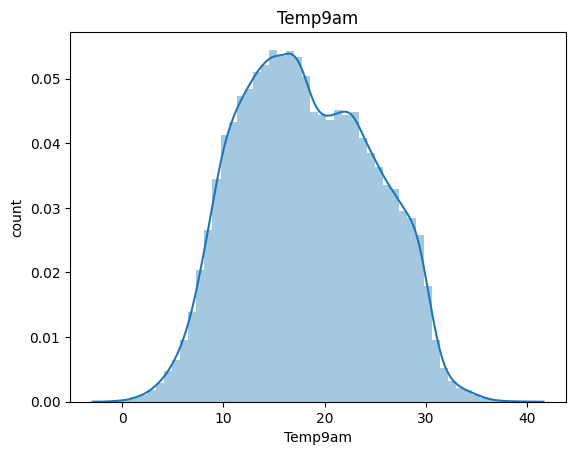

<Figure size 1500x1500 with 0 Axes>

<ipython-input-79-552294601990>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])


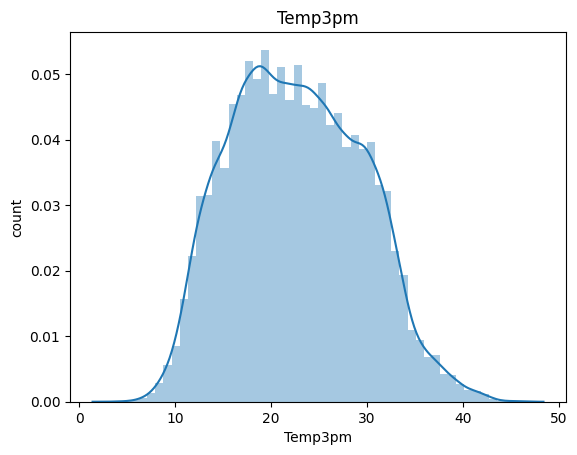

<Figure size 1500x1500 with 0 Axes>

In [79]:
# @title Analyzing each continuous feature
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.figure(figsize = (15,15))
    plt.show()

In [80]:
# @title Replacing the null values of the remaining continuous features by median
for feature in continuous_feature:
    if(df[feature].isnull().sum()*100/len(df))>0:
        df[feature] = df[feature].fillna(df[feature].median())

In [81]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [82]:
# @title Replacing the null values of the discrete features by mode
def mode_nan(df,variable):
    mode=df[variable].value_counts().index[0]
    df[variable].fillna(mode,inplace=True)
mode_nan(df,"Cloud9am")
mode_nan(df,"Cloud3pm")

In [83]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [84]:
# @title Handling categorical features using One Hot Encoding
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first = True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first = True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,False,False
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,False,False
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,False,False
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,False,False
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,False,False
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,False,False
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,False,False
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,False,False


In [85]:
# prompt: Using dataframe df: convert RainToday and RainTomorrowcolumns true=1,false=0

df['RainToday'] = df['RainToday'].apply(lambda x: 1 if x == True else 0)
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if x == True else 0)


In [86]:
df


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [87]:
# @title Grouping categorical features by 'RainTomorrow'
for feature in categorical_feature:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending = False)).index)

Date Index(['2007-11-01', '2008-02-03', '2008-01-30', '2008-01-19', '2008-01-18',
       '2008-11-19', '2008-01-16', '2017-03-21', '2008-01-12', '2008-03-24',
       ...
       '2008-06-13', '2008-06-14', '2008-06-15', '2008-06-16', '2008-06-17',
       '2008-06-18', '2008-06-20', '2008-06-21', '2008-06-22', '2008-12-24'],
      dtype='object', name='Date', length=3416)
Location Index(['Portland', 'CoffsHarbour', 'Cairns', 'NorfolkIsland', 'MountGambier',
       'Williamtown', 'Darwin', 'Watsonia', 'SydneyAirport', 'Melbourne',
       'Sydney', 'Hobart', 'Brisbane', 'MelbourneAirport', 'Sale', 'Perth',
       'Canberra', 'Nuriootpa', 'PerthAirport', 'WaggaWagga', 'Townsville',
       'Moree', 'Cobar', 'Mildura', 'AliceSprings', 'Woomera'],
      dtype='object', name='Location')
WindGustDir Index(['WNW', 'NW', 'W', 'NNW', 'N', 'WSW', 'NNE', 'S', 'SSW', 'SSE', 'SW',
       'SE', 'NE', 'ESE', 'E', 'ENE'],
      dtype='object', name='WindGustDir')
WindDir9am Index(['N', 'NNW', 'NNE', 'W', 

In [88]:
# @title Replacing the null values of the categorical features "WindGustDir", "WindDir9am" and "WindDir3pm"using Label Encoding,to avoid curse of dimensionality
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}
winddir9am = {'NNW':0, 'N':1, 'NW':2, 'NNE':3, 'WNW':4, 'W':5, 'WSW':6, 'SW':7, 'SSW':8, 'NE':9, 'S':10,
       'SSE':11, 'ENE':12, 'SE':13, 'ESE':14, 'E':15}
winddir3pm = {'NW':0, 'NNW':1, 'N':2, 'WNW':3, 'W':4, 'NNE':5, 'WSW':6, 'SSW':7, 'S':8, 'SW':9, 'SE':10,
       'NE':11, 'SSE':12, 'ENE':13, 'E':14, 'ESE':15}
df["WindGustDir"] = df["WindGustDir"].map(windgustdir)
df["WindDir9am"] = df["WindDir9am"].map(winddir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(winddir3pm)

In [89]:
df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [90]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,8,48.0,12,9,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,7,37.0,11,12,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,6,46.0,3,1,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,2,31.0,4,6,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,2,35.0,2,3,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,14,35.0,13,11,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,15,37.0,13,10,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,15,33.0,15,4,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,13,26.0,13,1,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [91]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,8,48.0,12,9,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,7,37.0,11,12,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,6,46.0,3,1,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,2,31.0,4,6,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,2,35.0,2,3,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,14,35.0,13,11,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,15,37.0,13,10,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,15,33.0,15,4,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,13,26.0,13,1,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [92]:
# @title Performing Label Encoding on "Location"
df1 = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()

In [93]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,8,48.0,12,9,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,7,37.0,11,12,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,6,46.0,3,1,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,2,31.0,4,6,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,2,35.0,2,3,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,14,35.0,13,11,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,15,37.0,13,10,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,15,33.0,15,4,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,13,26.0,13,1,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [94]:
df1

RainTomorrow,0,1
Location,,
AliceSprings,2036,187
Brisbane,2311,642
Cairns,1693,751
Canberra,859,219
Cobar,471,63
CoffsHarbour,949,431
Darwin,2273,789
Hobart,1471,468
Melbourne,1427,471


In [95]:
df1[1].sort_values(ascending = False)

,1
Location,
Darwin,789
Cairns,751
Portland,746
NorfolkIsland,743
MountGambier,732
SydneyAirport,715
Watsonia,684
Brisbane,642
MelbourneAirport,636


In [96]:
df1[1].sort_values(ascending= False).index

Index(['Darwin', 'Cairns', 'Portland', 'NorfolkIsland', 'MountGambier',
       'SydneyAirport', 'Watsonia', 'Brisbane', 'MelbourneAirport', 'Perth',
       'PerthAirport', 'Melbourne', 'Hobart', 'CoffsHarbour', 'WaggaWagga',
       'Sydney', 'Townsville', 'Nuriootpa', 'Sale', 'Williamtown', 'Mildura',
       'Moree', 'Canberra', 'AliceSprings', 'Woomera', 'Cobar'],
      dtype='object', name='Location')

In [97]:
len(df1[1].sort_values(ascending = False).index)

26

In [98]:
location = {'Portland':1, 'Cairns':2, 'Walpole':3, 'Dartmoor':4, 'MountGambier':5,
       'NorfolkIsland':6, 'Albany':7, 'Witchcliffe':8, 'CoffsHarbour':9, 'Sydney':10,
       'Darwin':11, 'MountGinini':12, 'NorahHead':13, 'Ballarat':14, 'GoldCoast':15,
       'SydneyAirport':16, 'Hobart':17, 'Watsonia':18, 'Newcastle':19, 'Wollongong':20,
       'Brisbane':21, 'Williamtown':22, 'Launceston':23, 'Adelaide':24, 'MelbourneAirport':25,
       'Perth':26, 'Sale':27, 'Melbourne':28, 'Canberra':29, 'Albury':30, 'Penrith':31,
       'Nuriootpa':32, 'BadgerysCreek':33, 'Tuggeranong':34, 'PerthAirport':35, 'Bendigo':36,
       'Richmond':37, 'WaggaWagga':38, 'Townsville':39, 'PearceRAAF':40, 'SalmonGums':41,
       'Moree':42, 'Cobar':43, 'Mildura':44, 'Katherine':45, 'AliceSprings':46, 'Nhil':47,
       'Woomera':48, 'Uluru':49}
df["Location"] = df["Location"].map(location)

In [99]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,43,17.9,35.2,0.0,12.0,12.3,8,48.0,12,9,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,2009-01-02,43,18.4,28.9,0.0,14.8,13.0,7,37.0,11,12,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,2009-01-04,43,19.4,37.6,0.0,10.8,10.6,6,46.0,3,1,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,2009-01-05,43,21.9,38.4,0.0,11.4,12.2,2,31.0,4,6,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,2009-01-06,43,24.2,41.0,0.0,11.2,8.4,2,35.0,2,3,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,11,19.3,33.4,0.0,6.0,11.0,14,35.0,13,11,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,2017-06-21,11,21.2,32.6,0.0,7.6,8.6,15,37.0,13,10,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,2017-06-22,11,20.7,32.8,0.0,5.6,11.0,15,33.0,15,4,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,2017-06-23,11,19.5,31.8,0.0,6.2,10.6,13,26.0,13,1,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [100]:
import pandas as pd # Import pandas for datetime operations

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Now you can extract month, day, and year
df['Date_month'] = df['Date'].dt.month
df['Date_day'] = df['Date'].dt.day

In [101]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
6049,2009-01-01,43,17.9,35.2,0.0,12.0,12.3,8,48.0,12,9,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,1,1
6050,2009-01-02,43,18.4,28.9,0.0,14.8,13.0,7,37.0,11,12,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,1,2
6052,2009-01-04,43,19.4,37.6,0.0,10.8,10.6,6,46.0,3,1,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,1,4
6053,2009-01-05,43,21.9,38.4,0.0,11.4,12.2,2,31.0,4,6,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,1,5
6054,2009-01-06,43,24.2,41.0,0.0,11.2,8.4,2,35.0,2,3,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,11,19.3,33.4,0.0,6.0,11.0,14,35.0,13,11,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0,6,20
142299,2017-06-21,11,21.2,32.6,0.0,7.6,8.6,15,37.0,13,10,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0,6,21
142300,2017-06-22,11,20.7,32.8,0.0,5.6,11.0,15,33.0,15,4,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0,6,22
142301,2017-06-23,11,19.5,31.8,0.0,6.2,10.6,13,26.0,13,1,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0,6,23


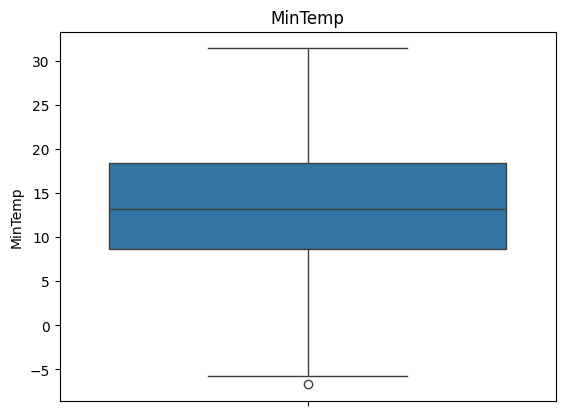

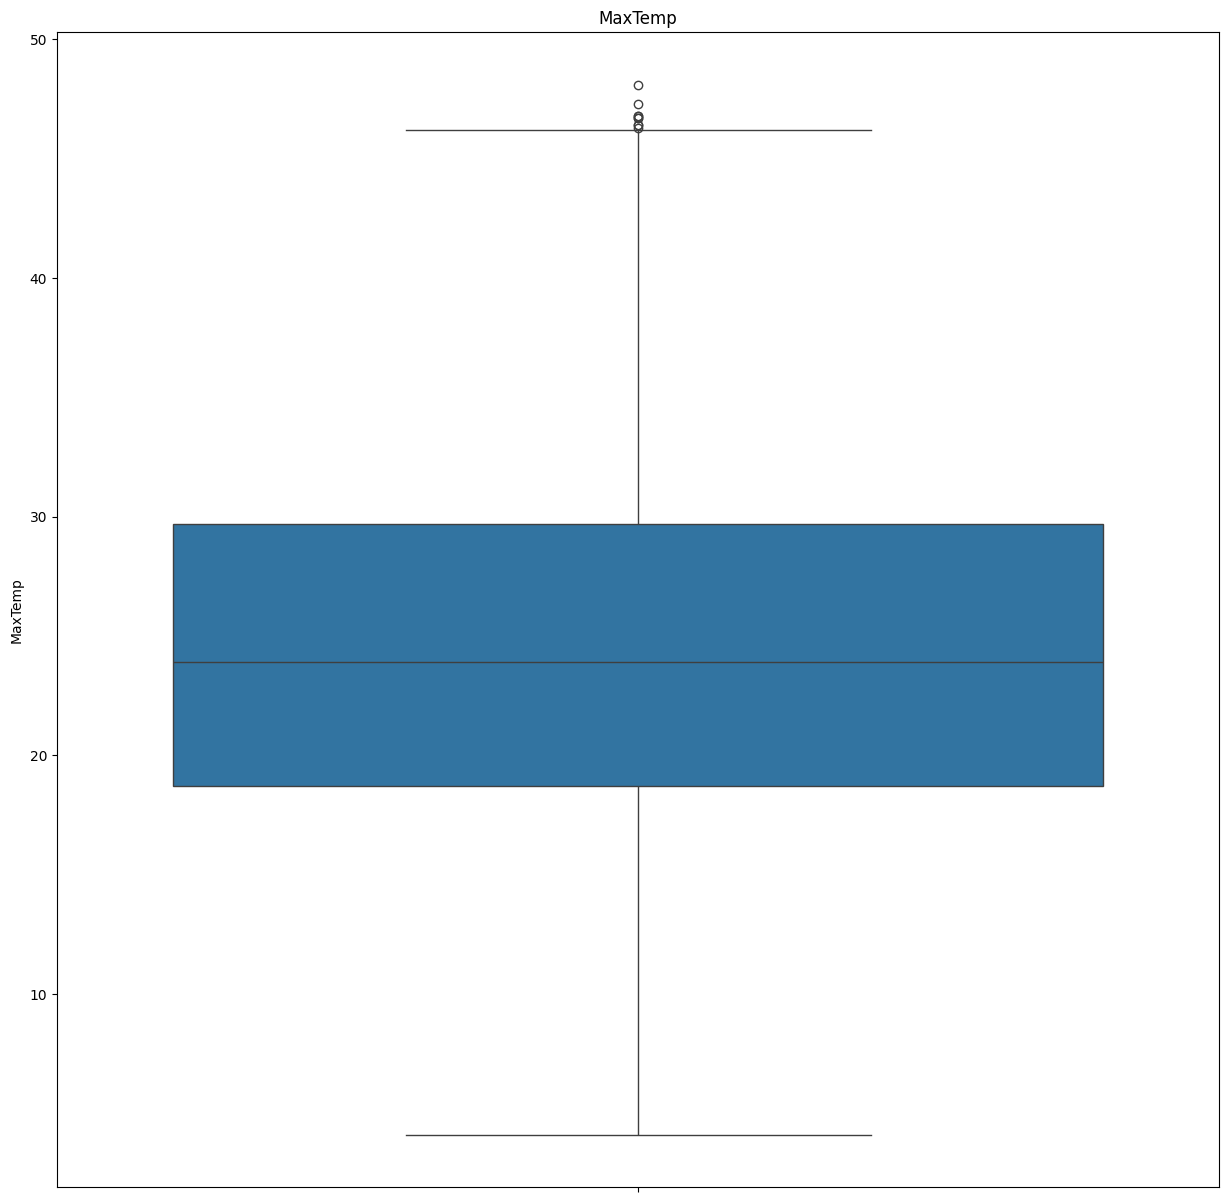

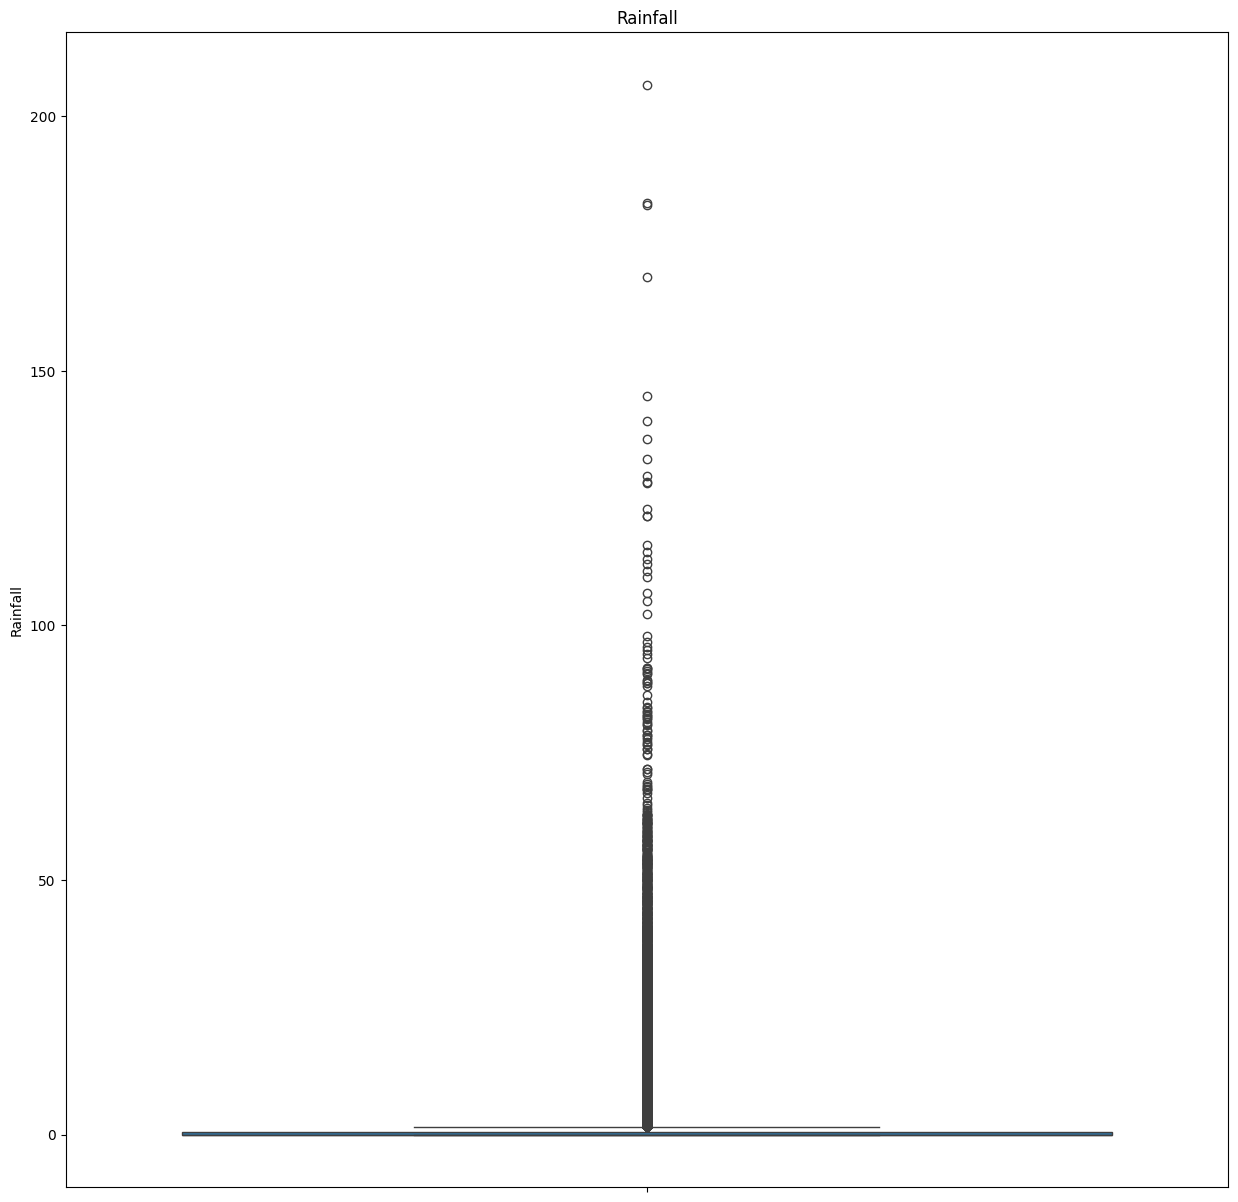

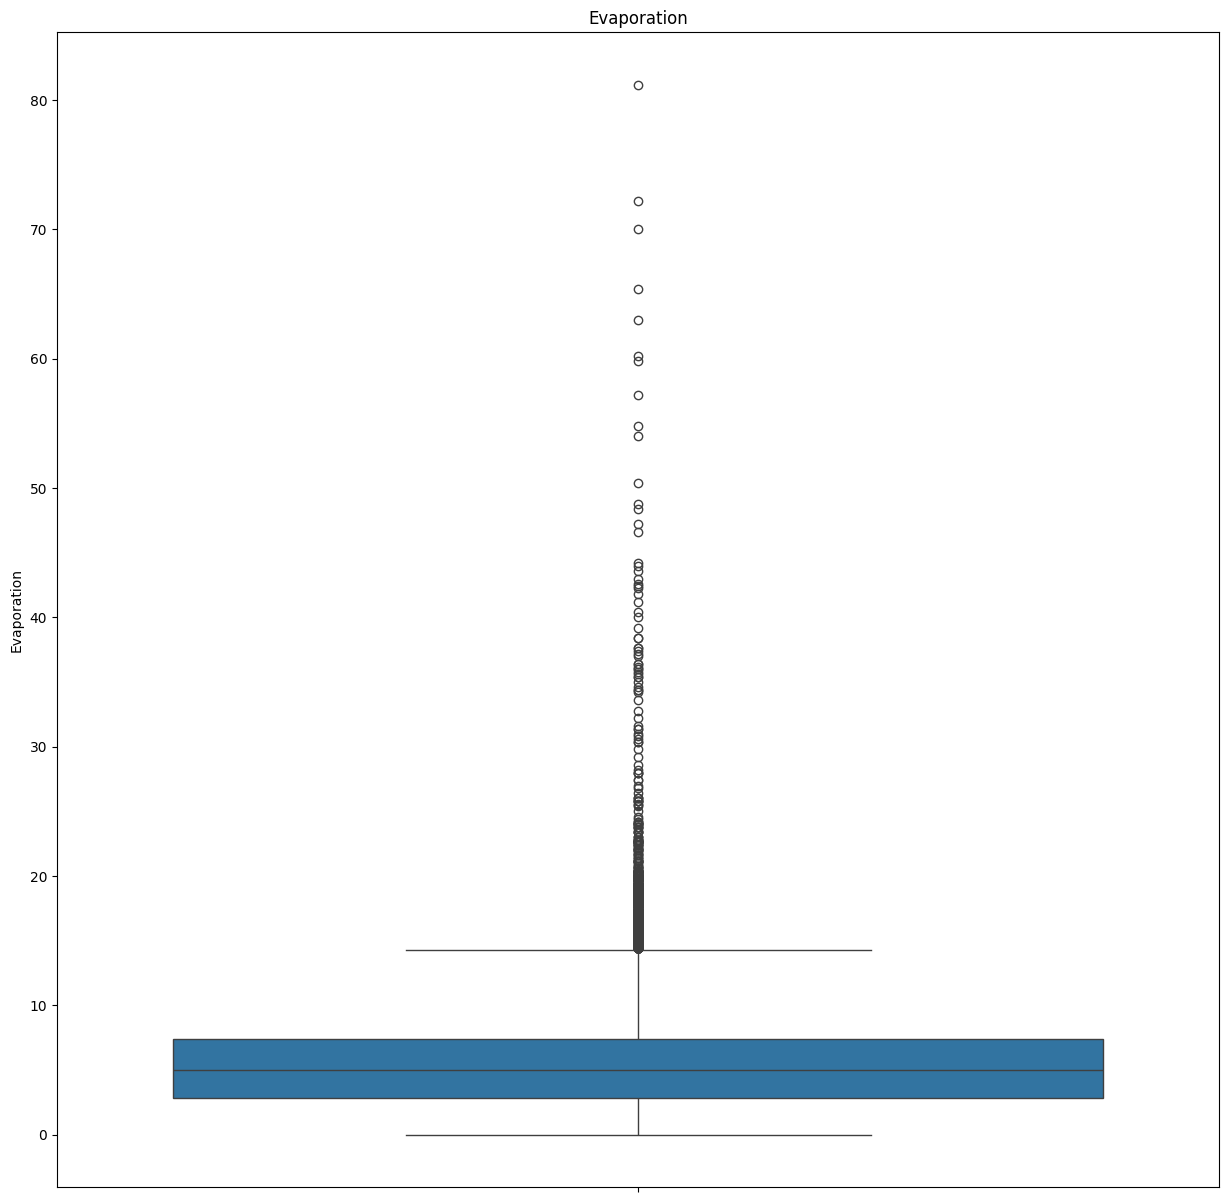

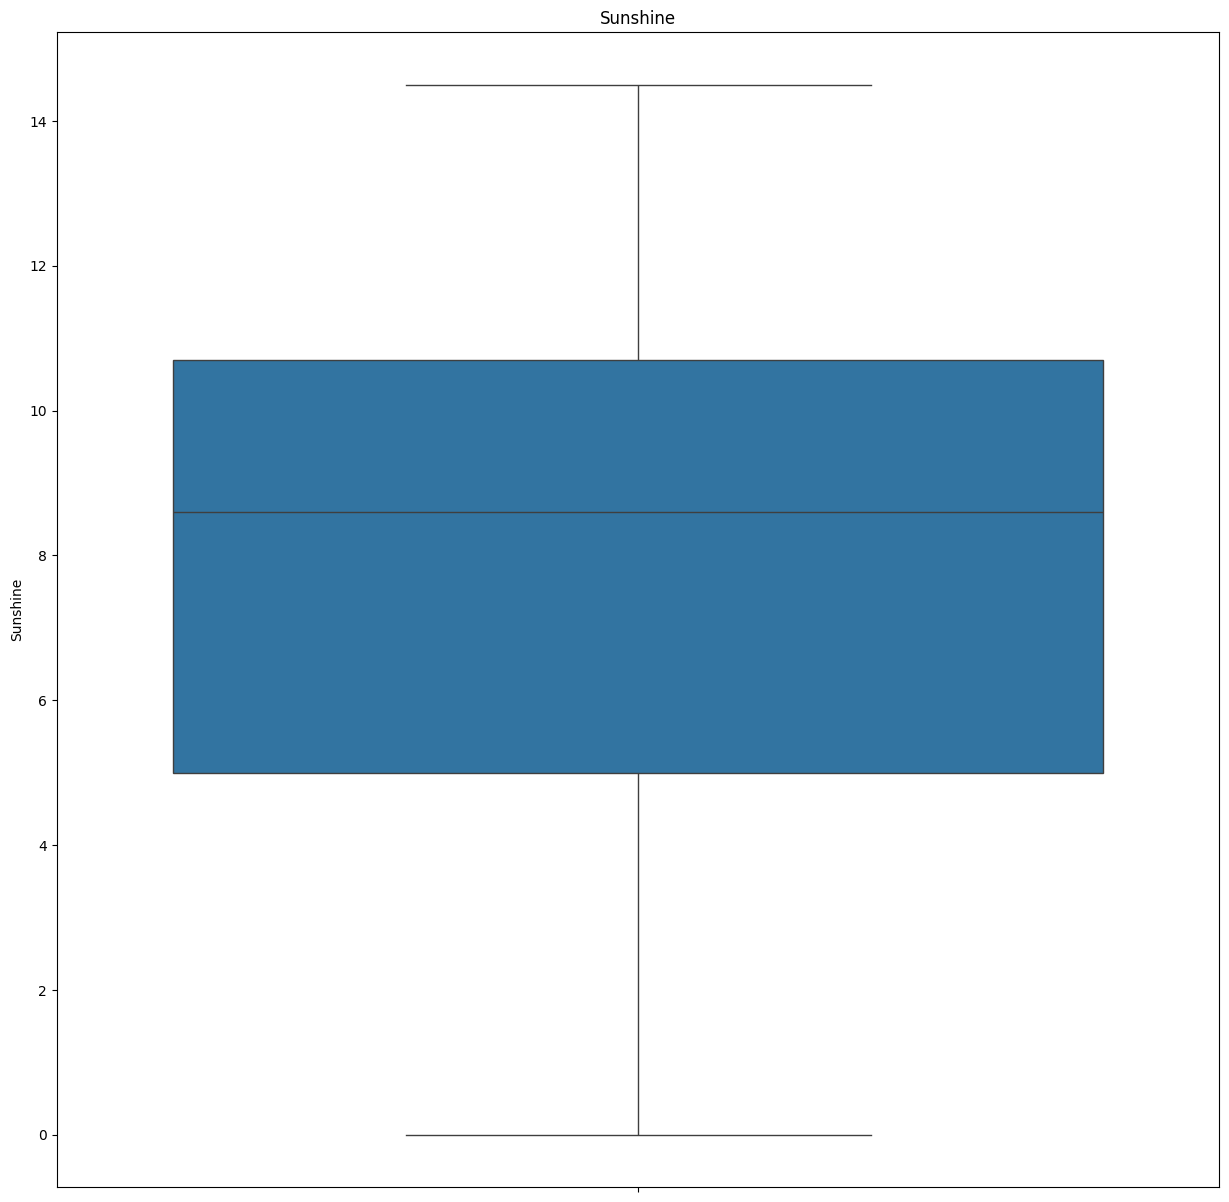

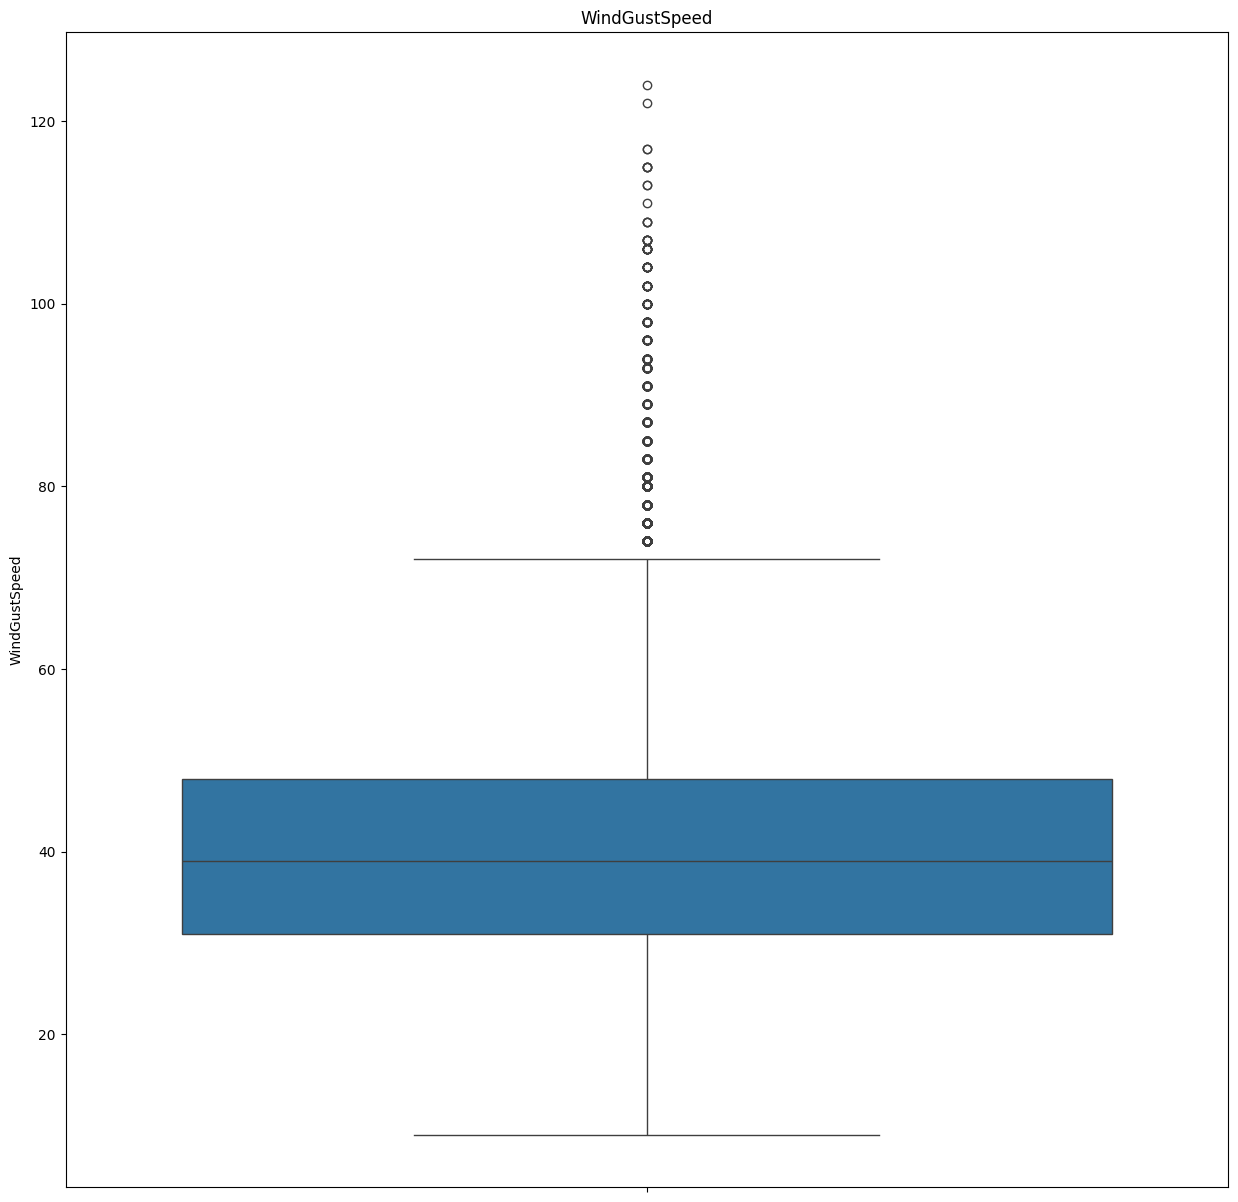

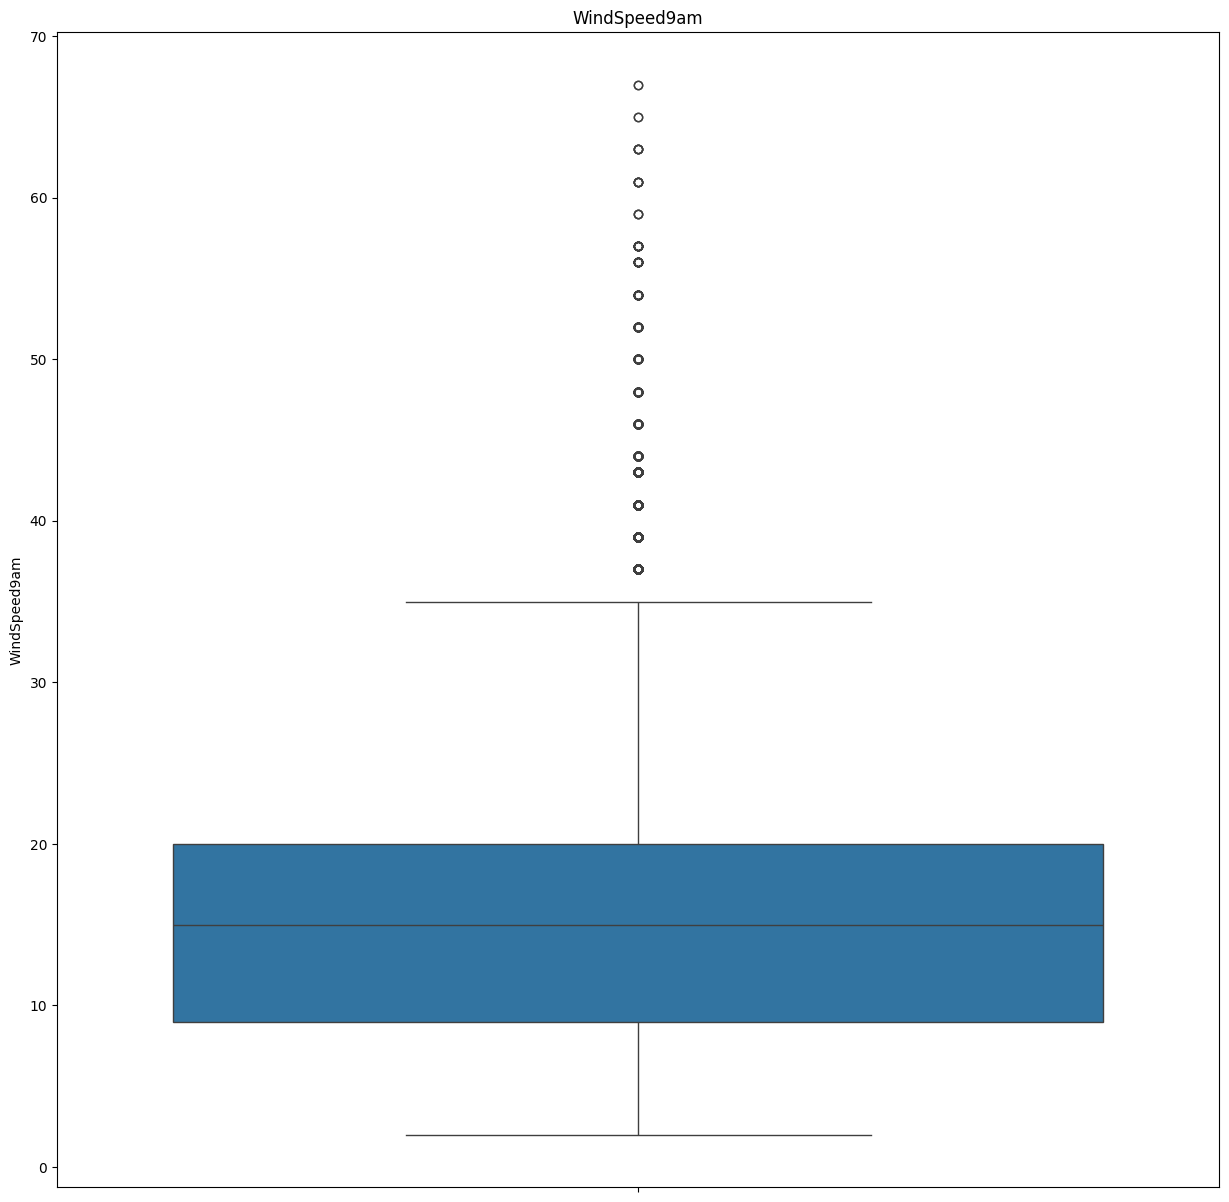

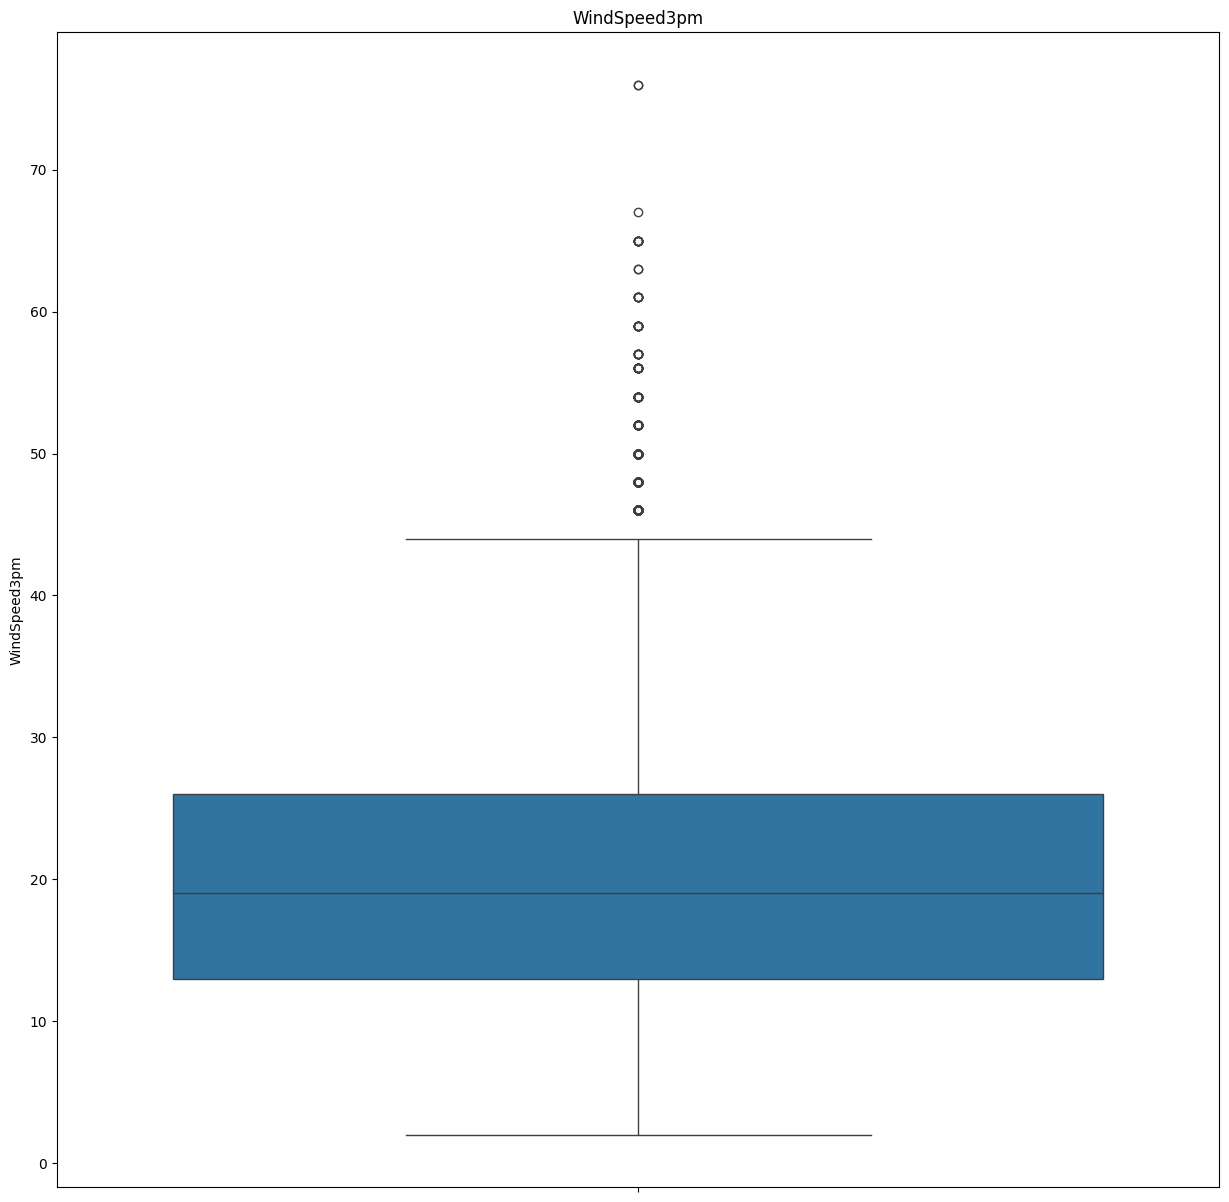

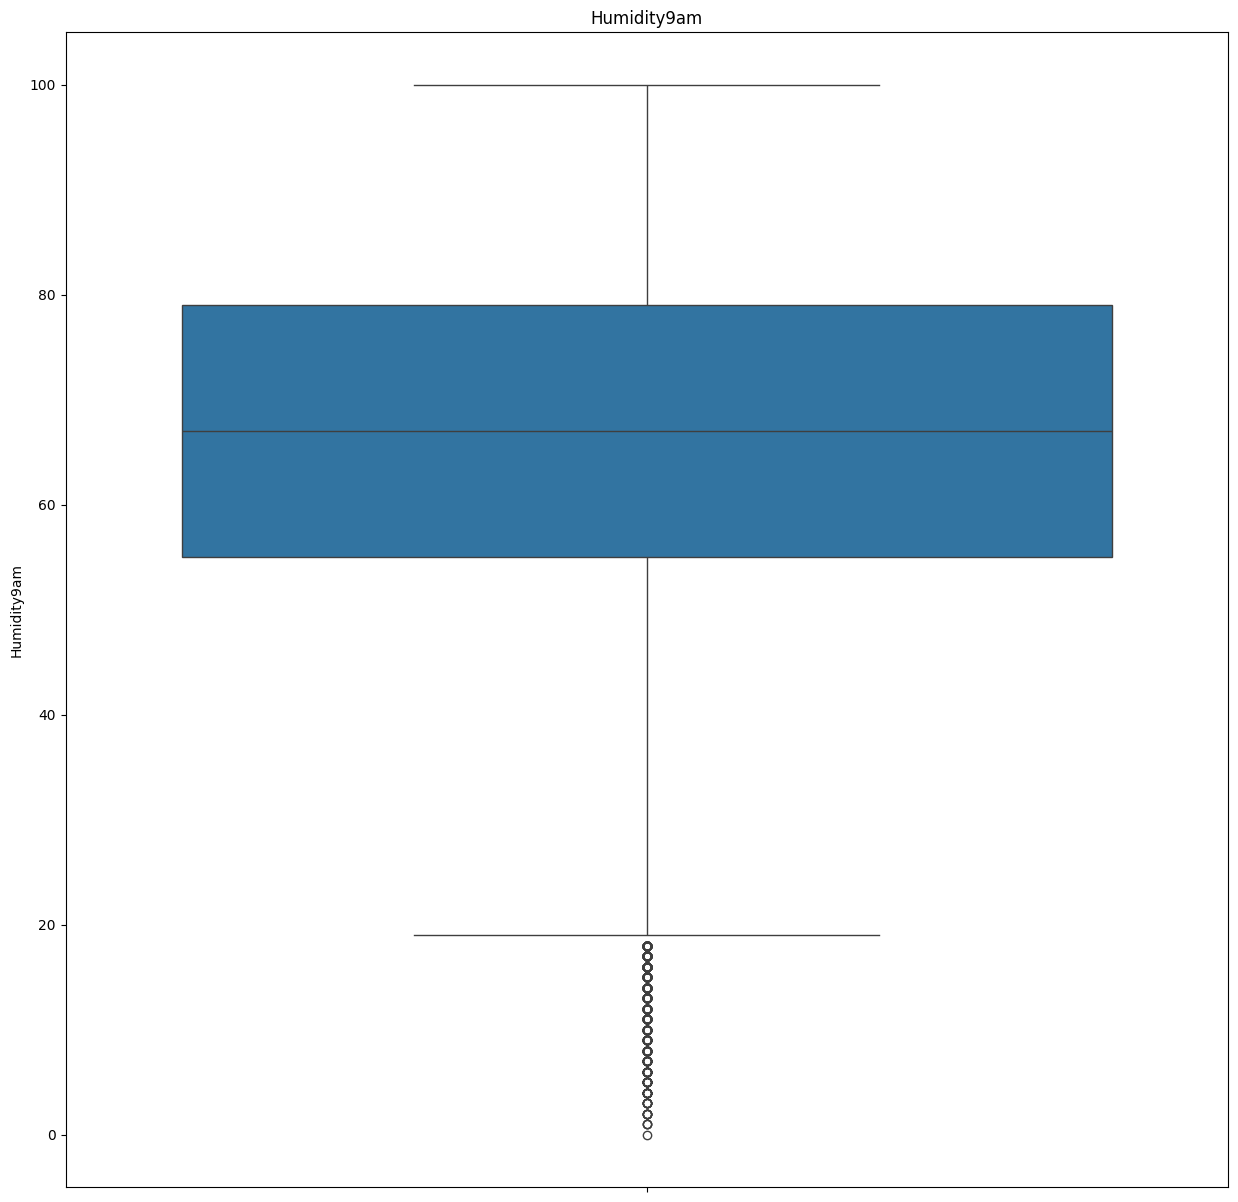

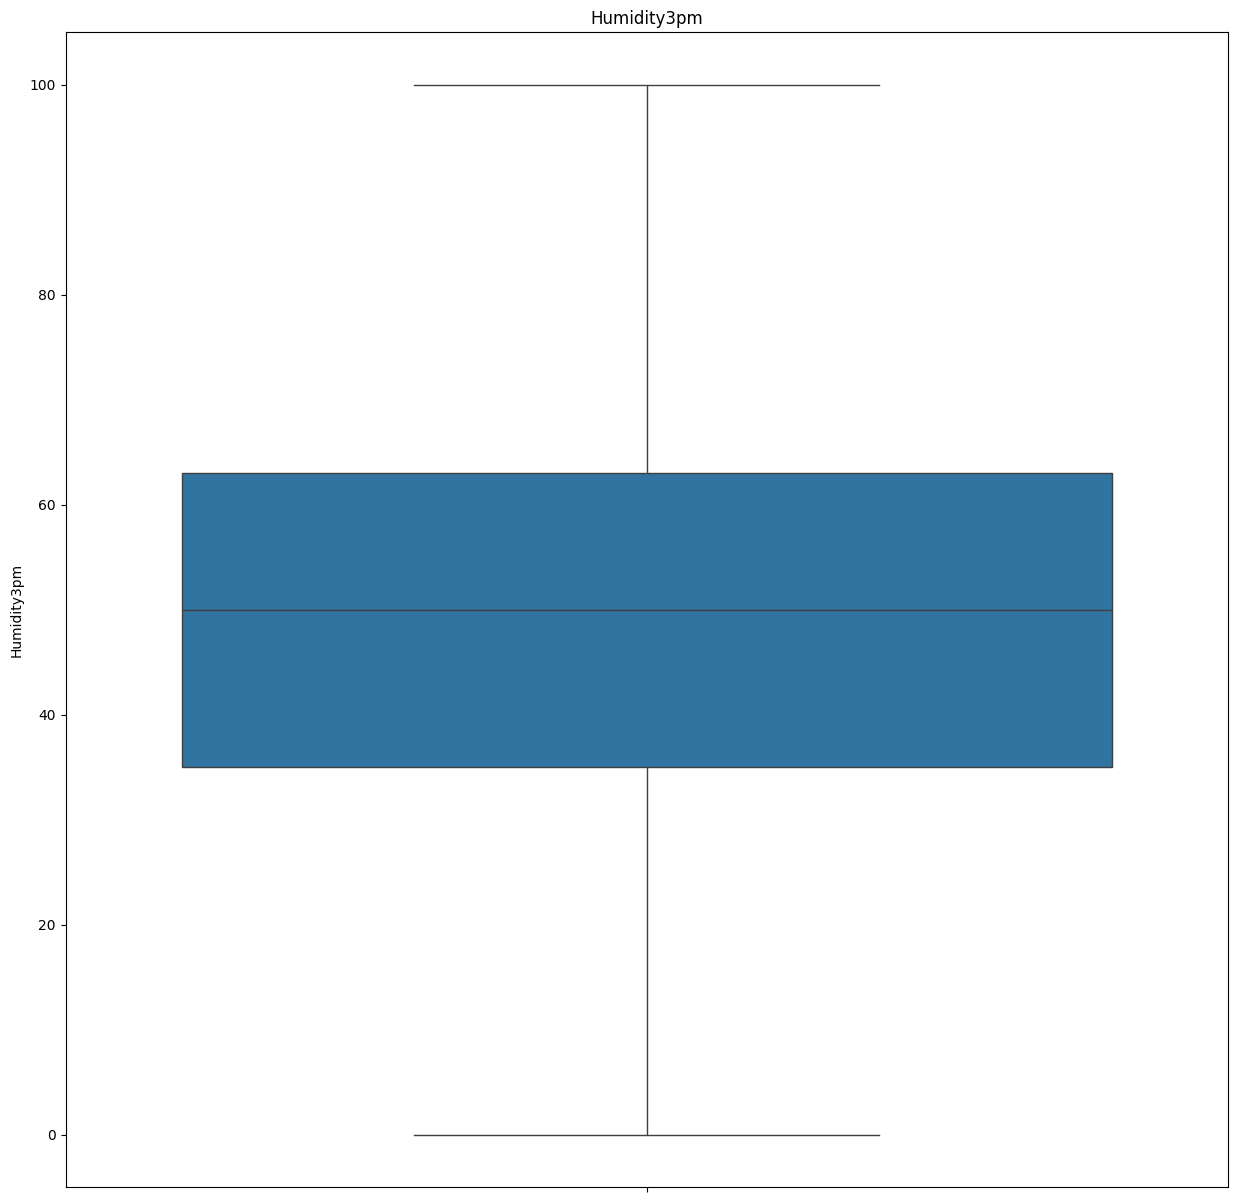

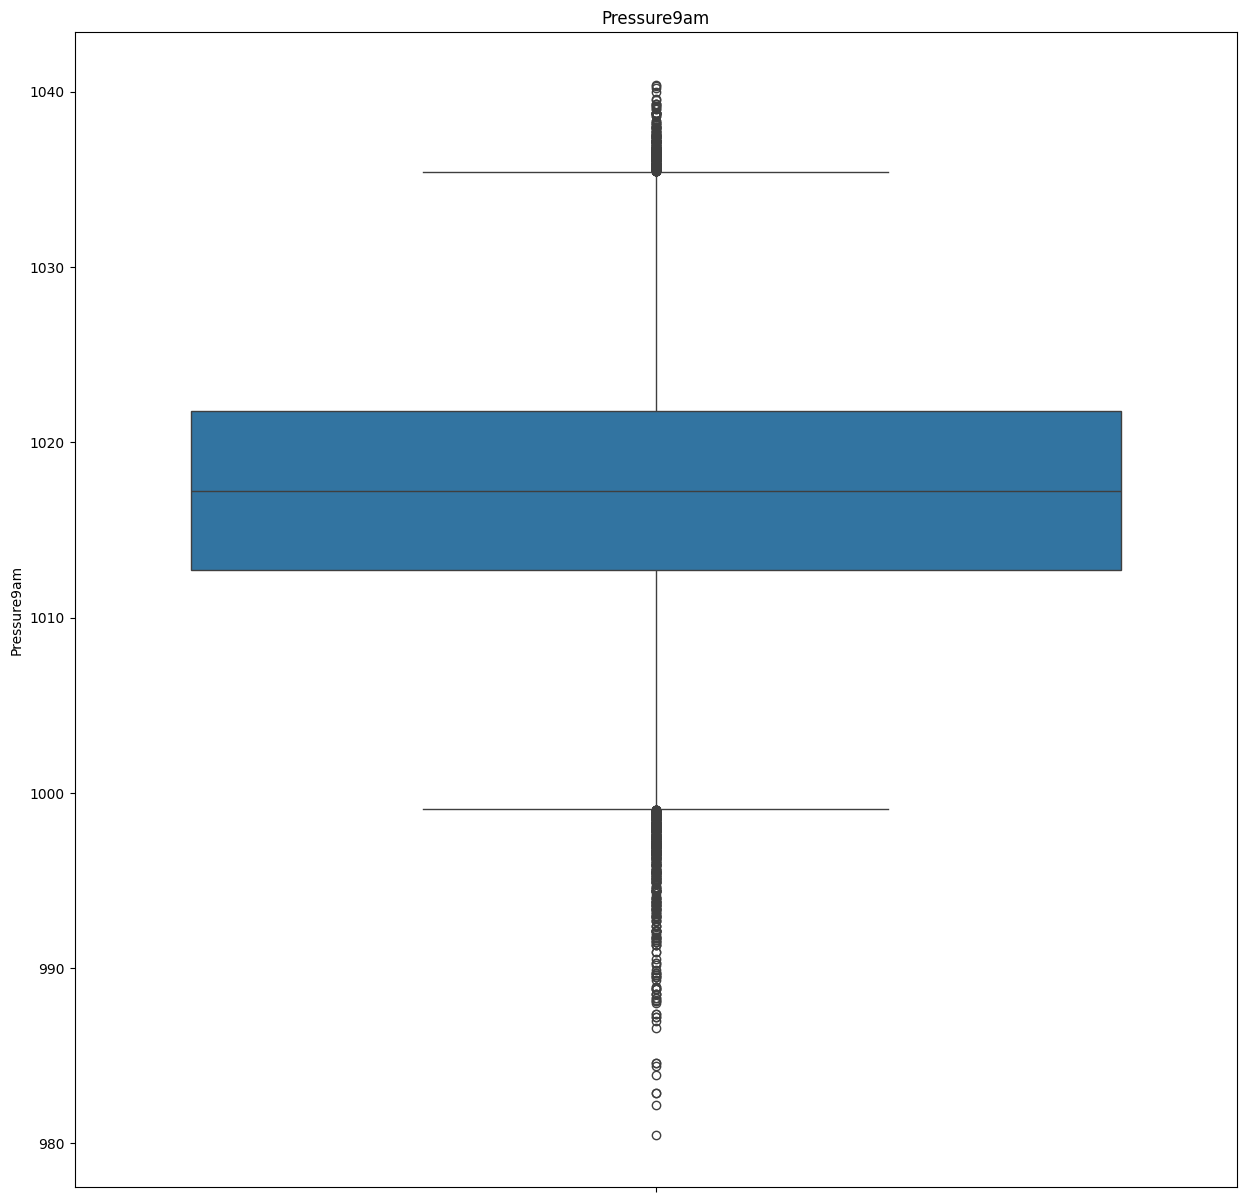

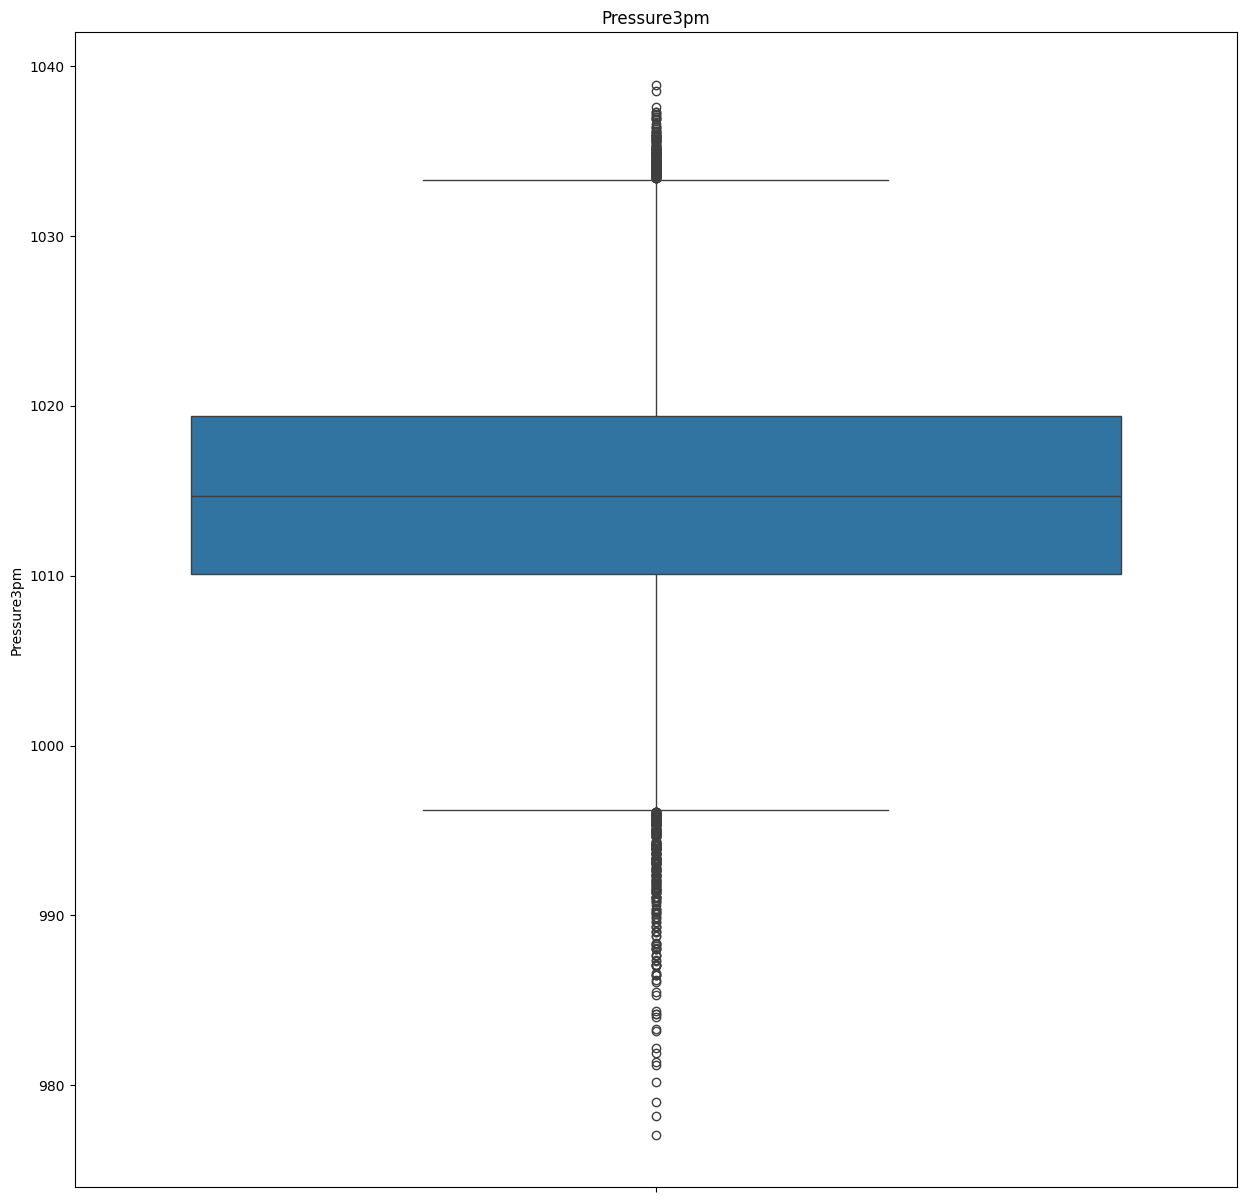

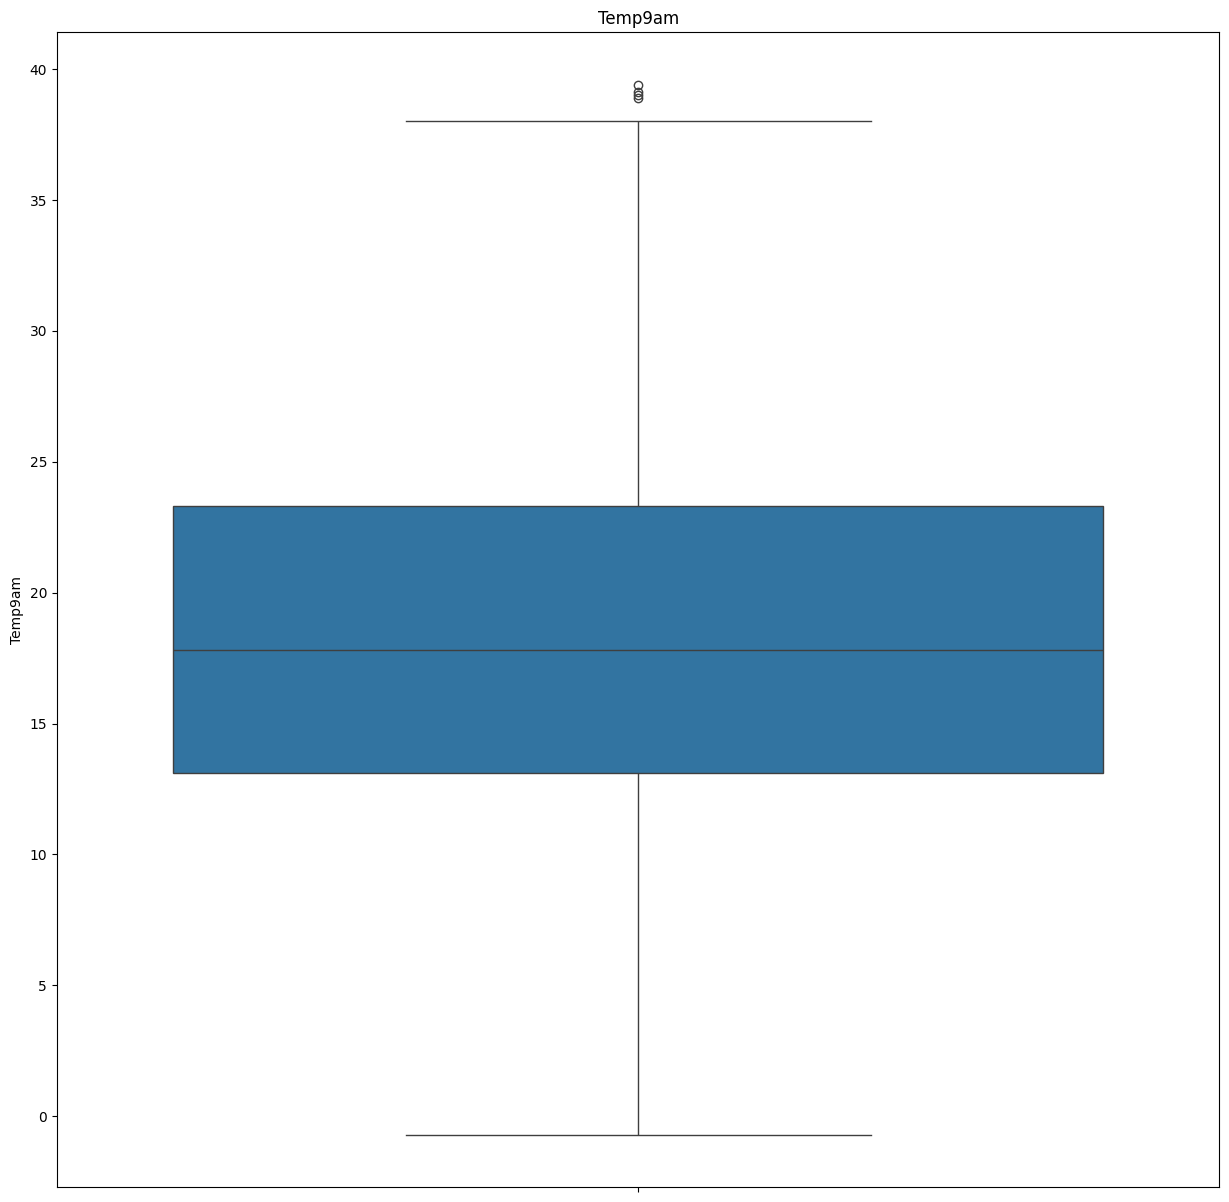

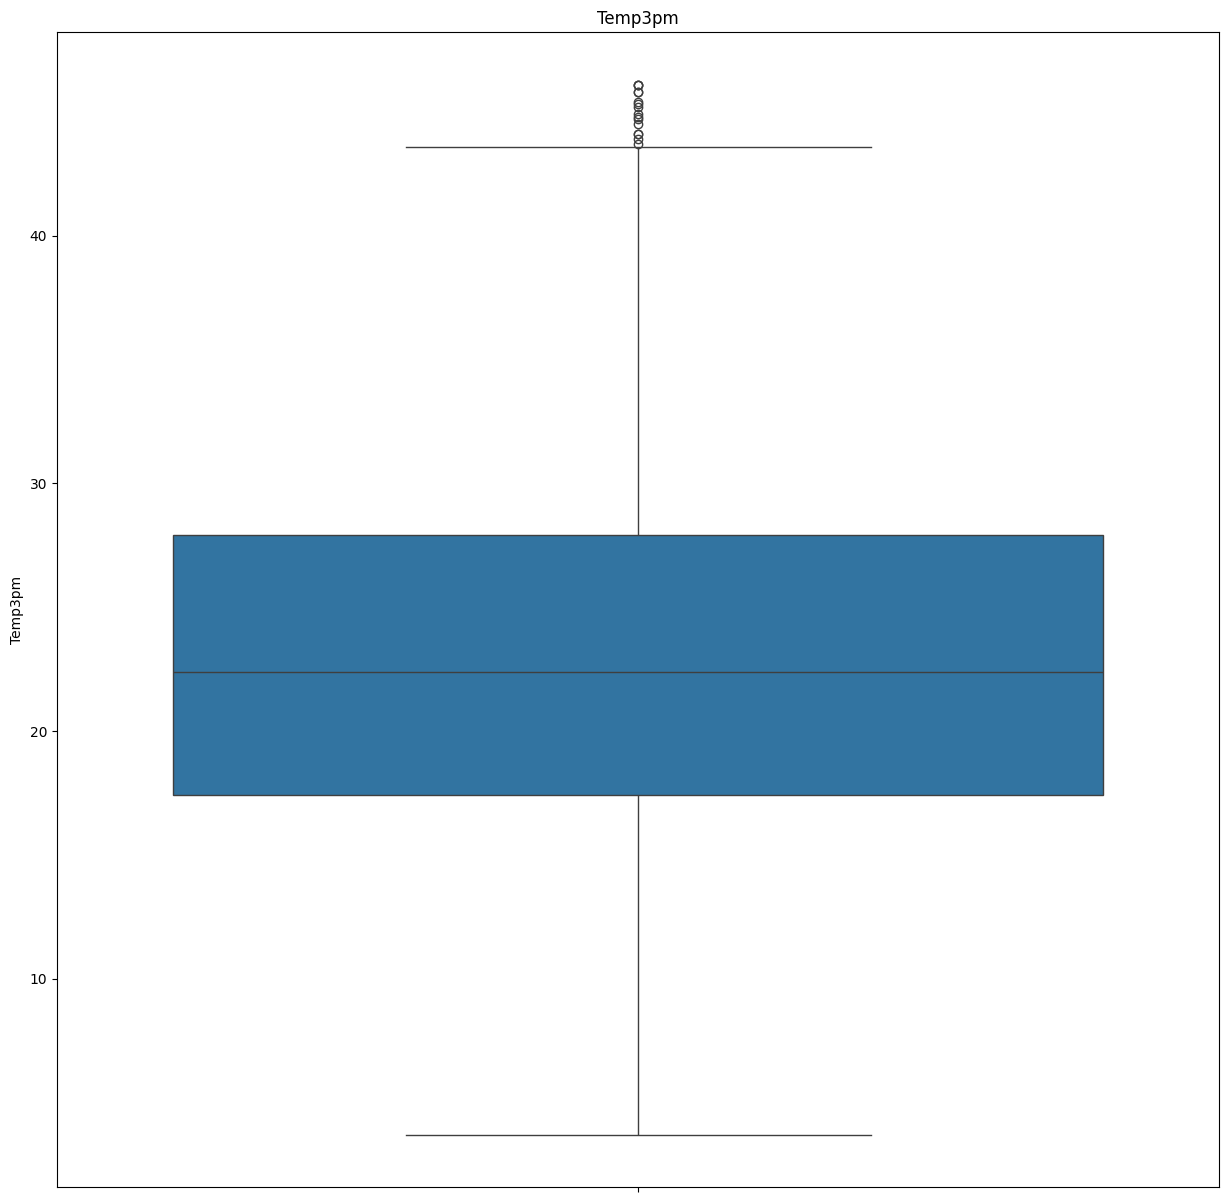

<Figure size 1500x1500 with 0 Axes>

In [102]:
# @title Outliers Treatment
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

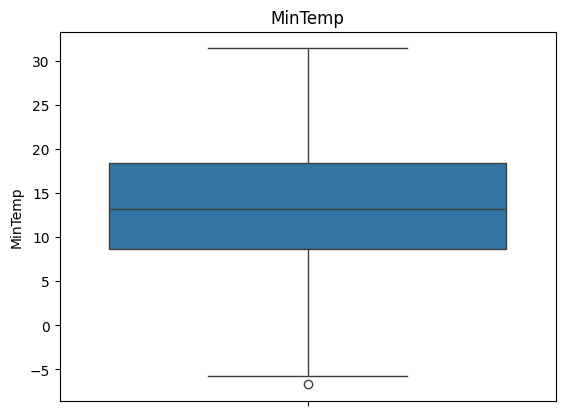

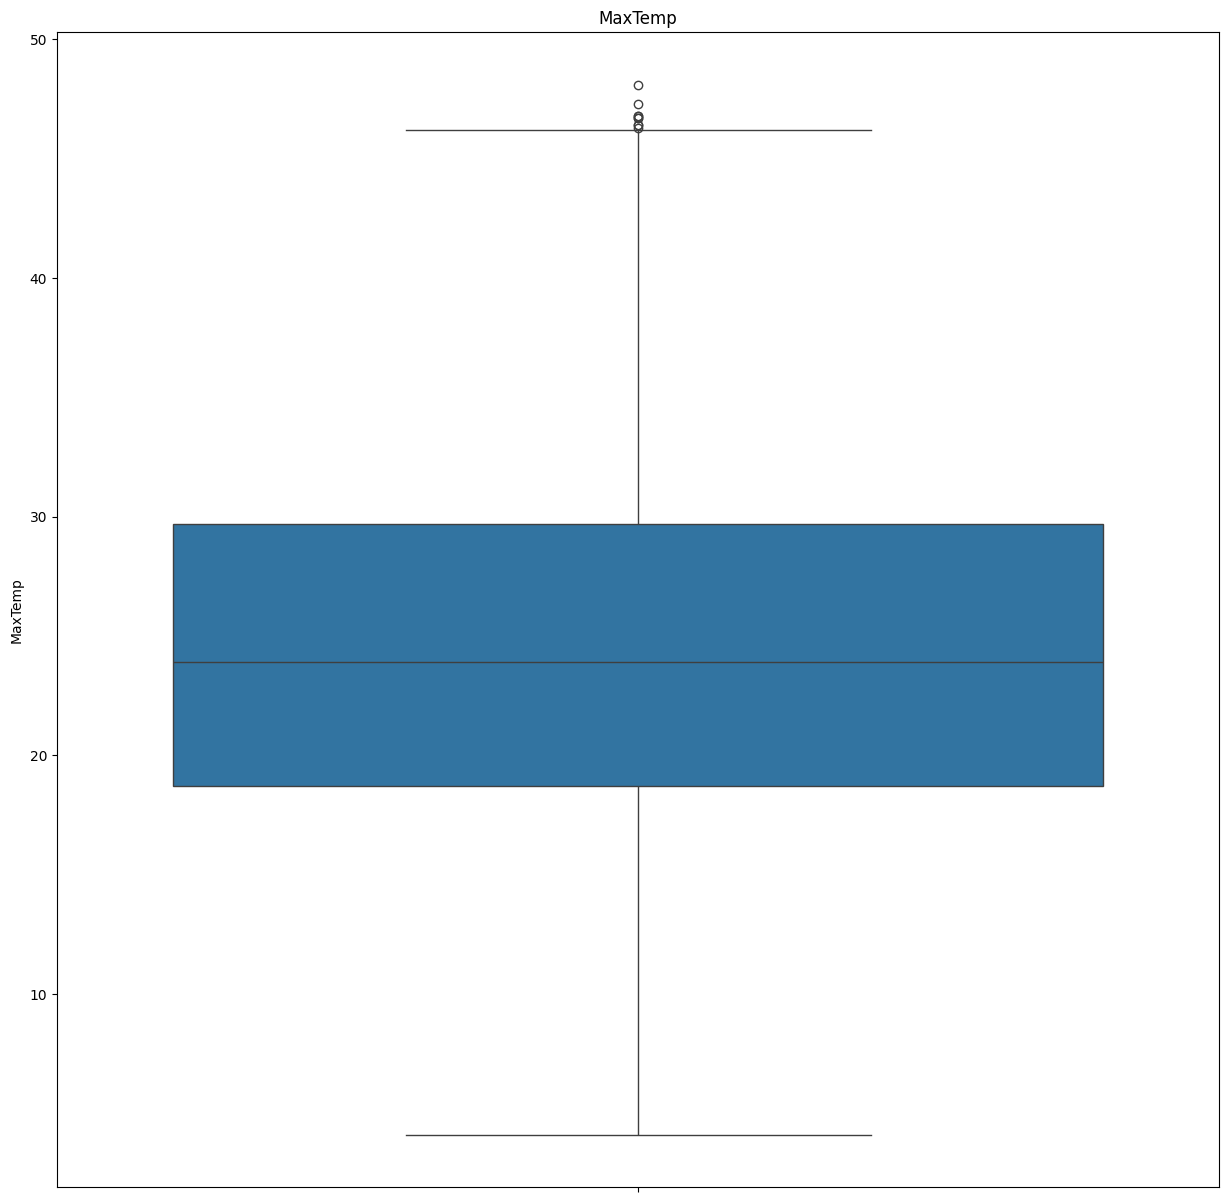

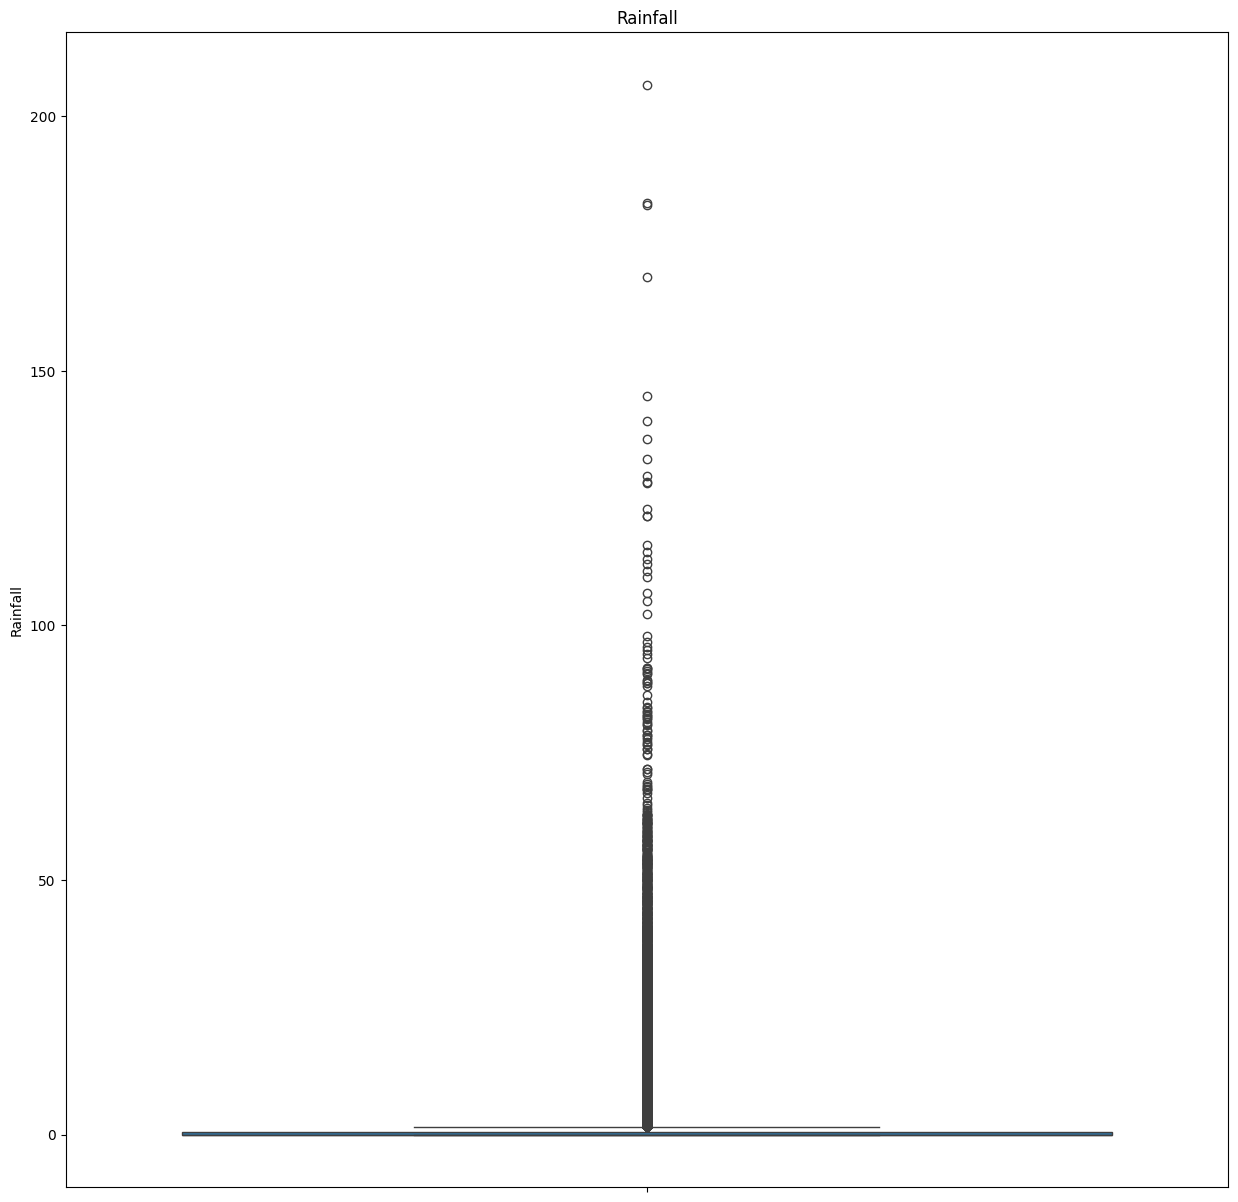

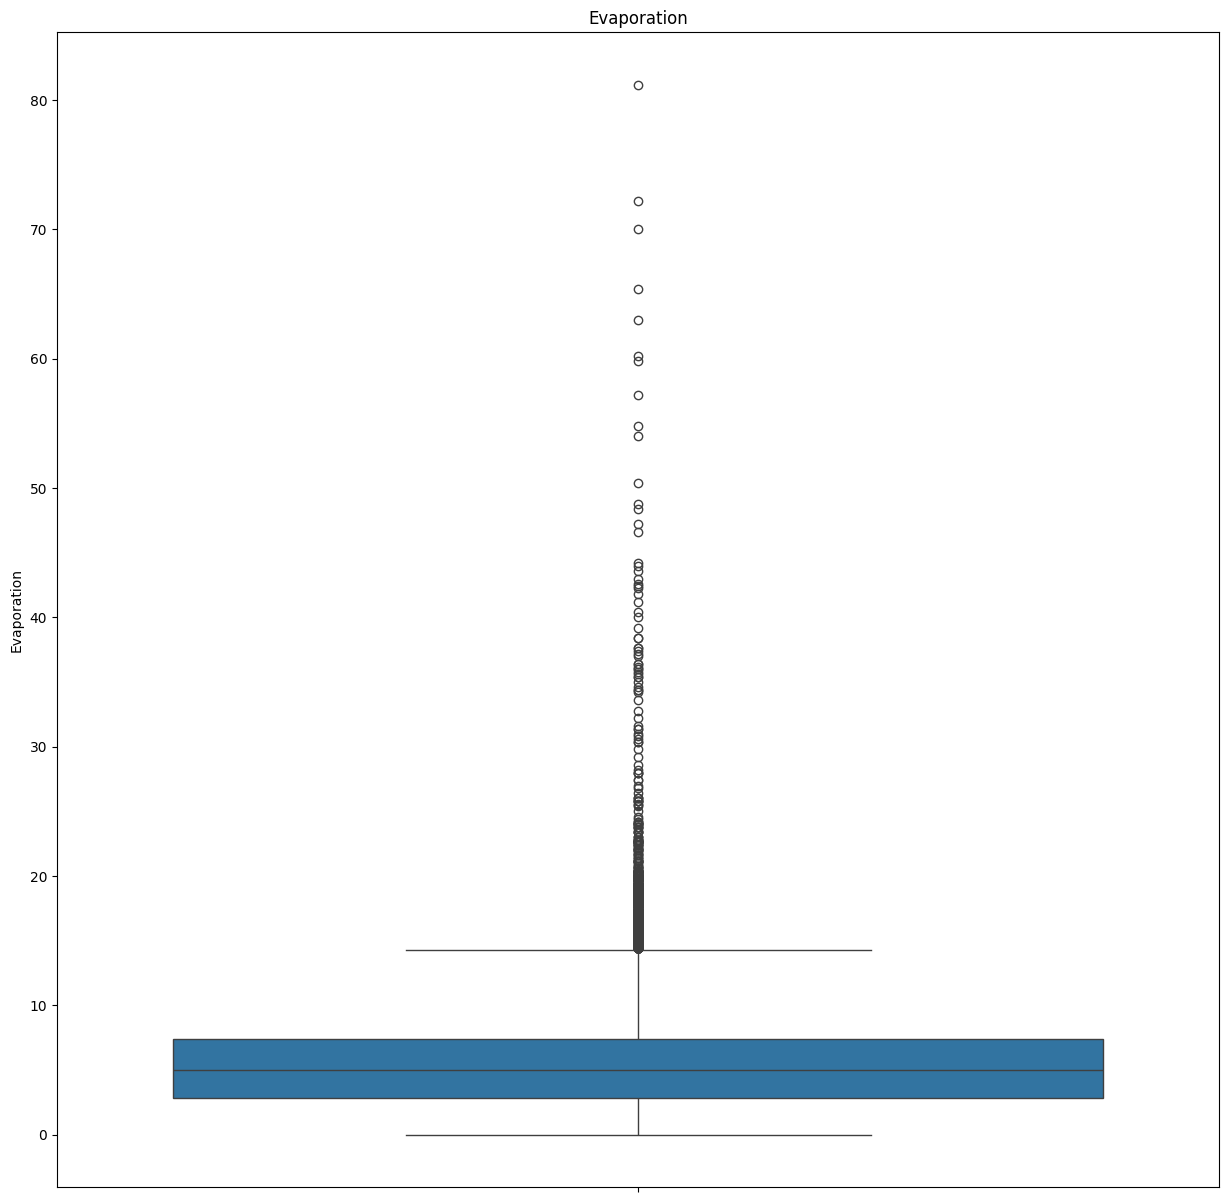

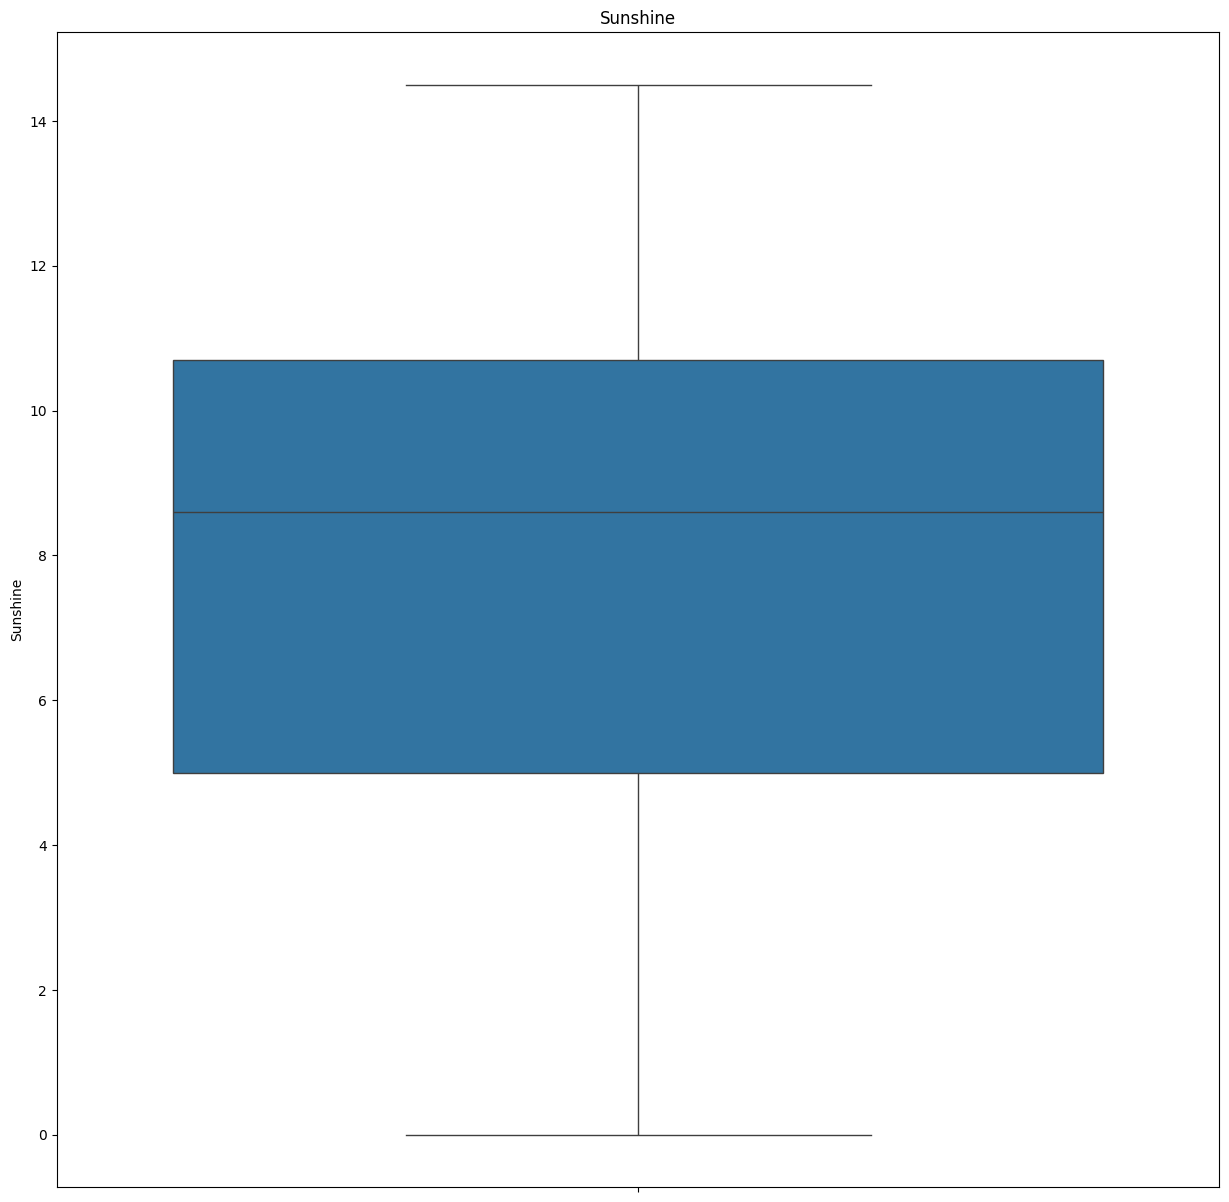

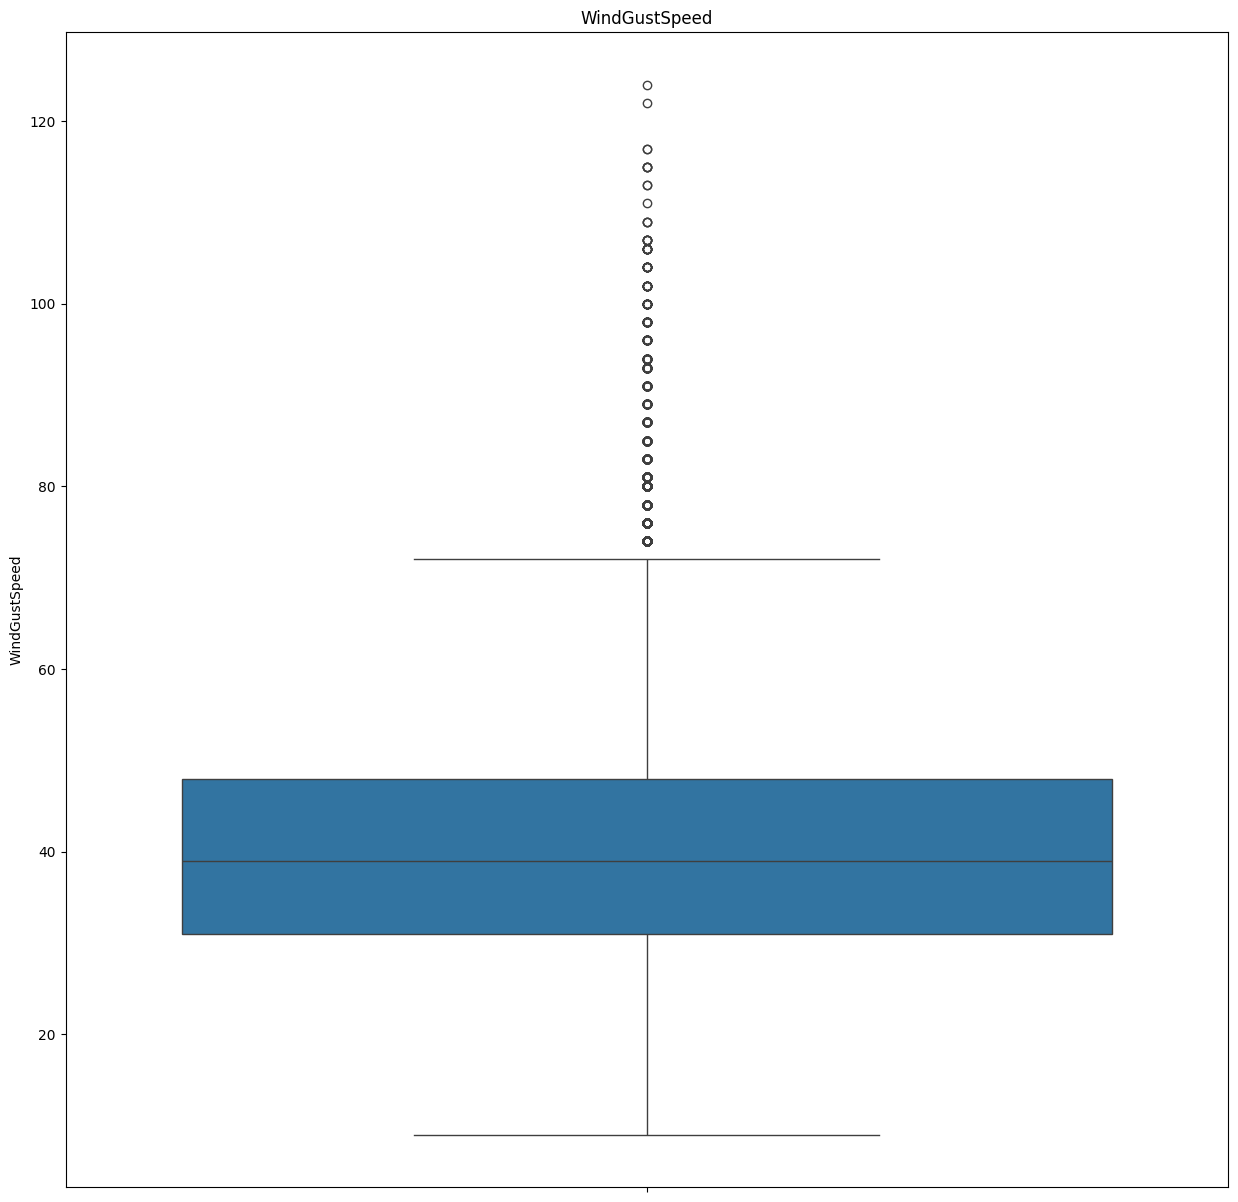

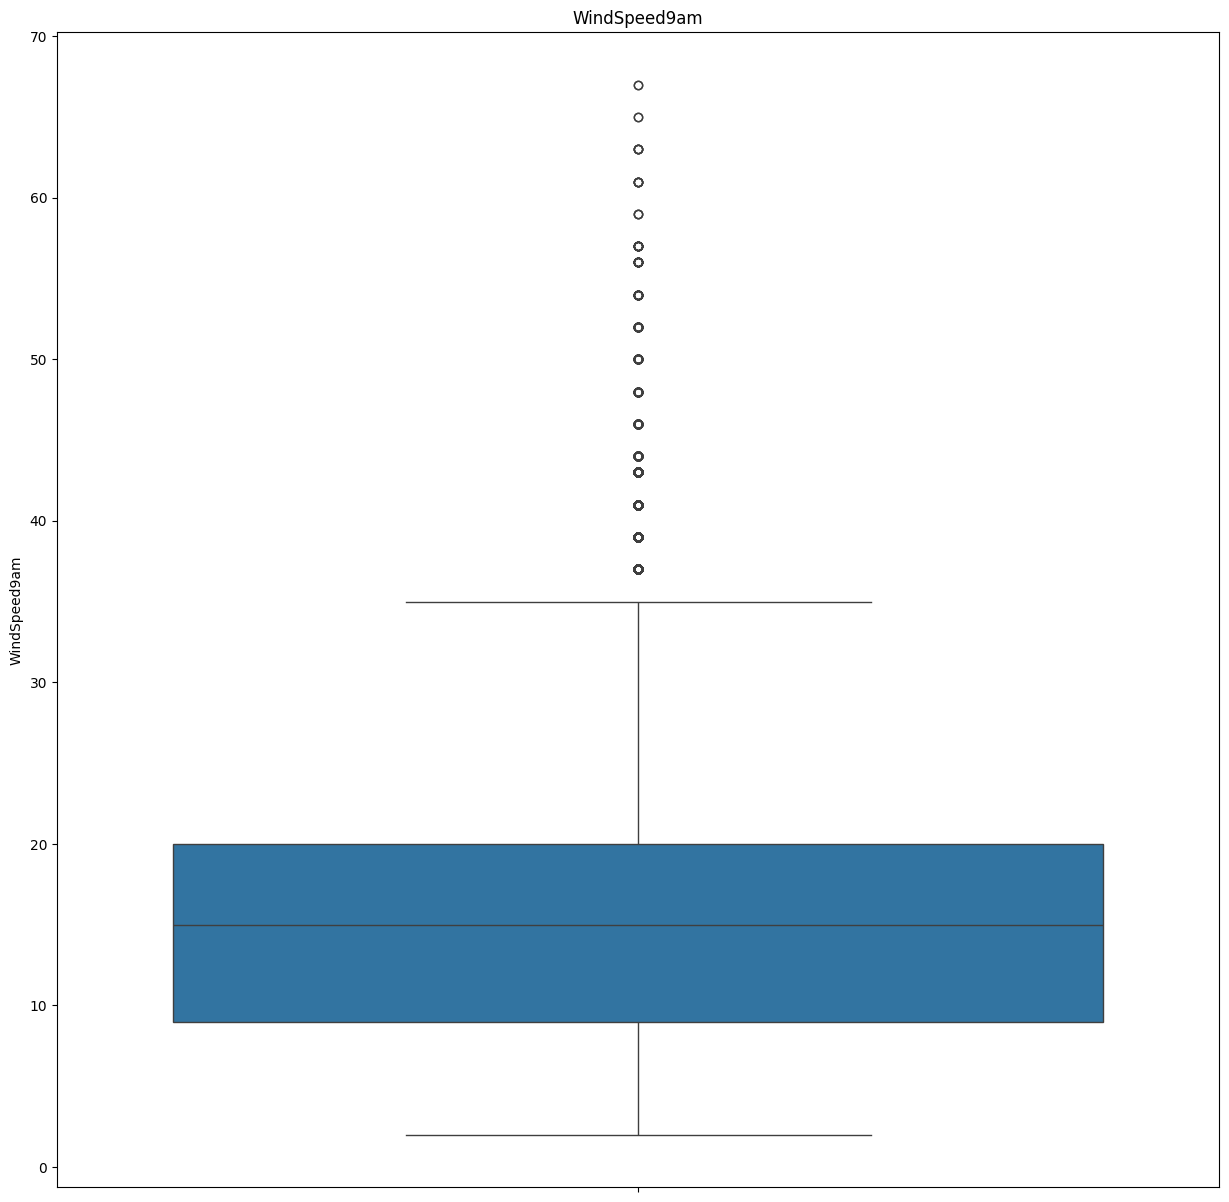

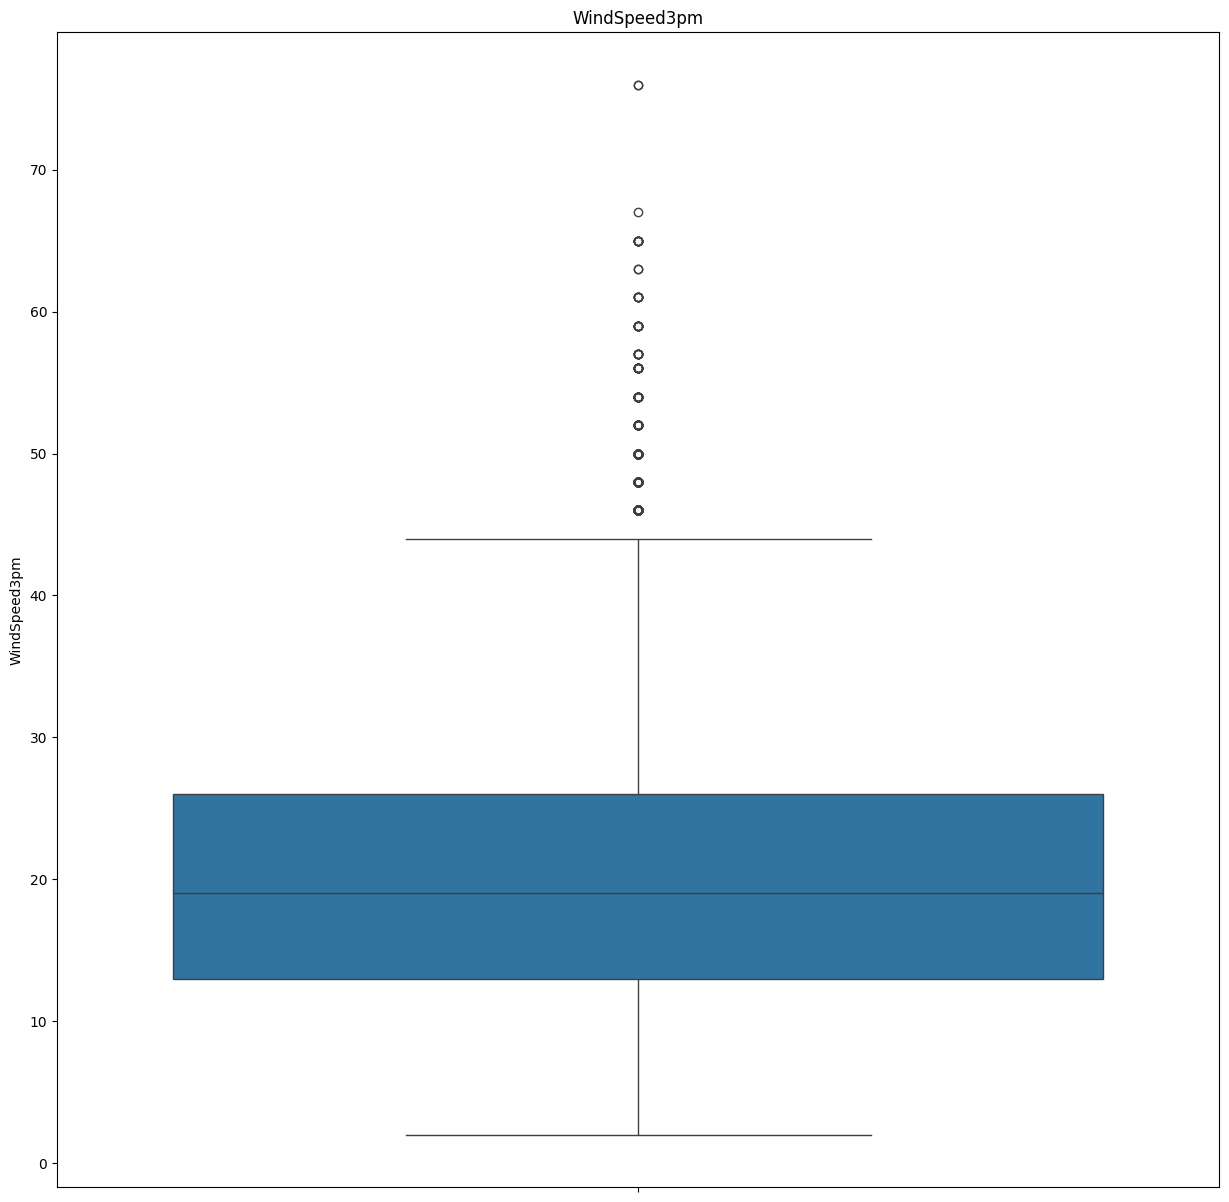

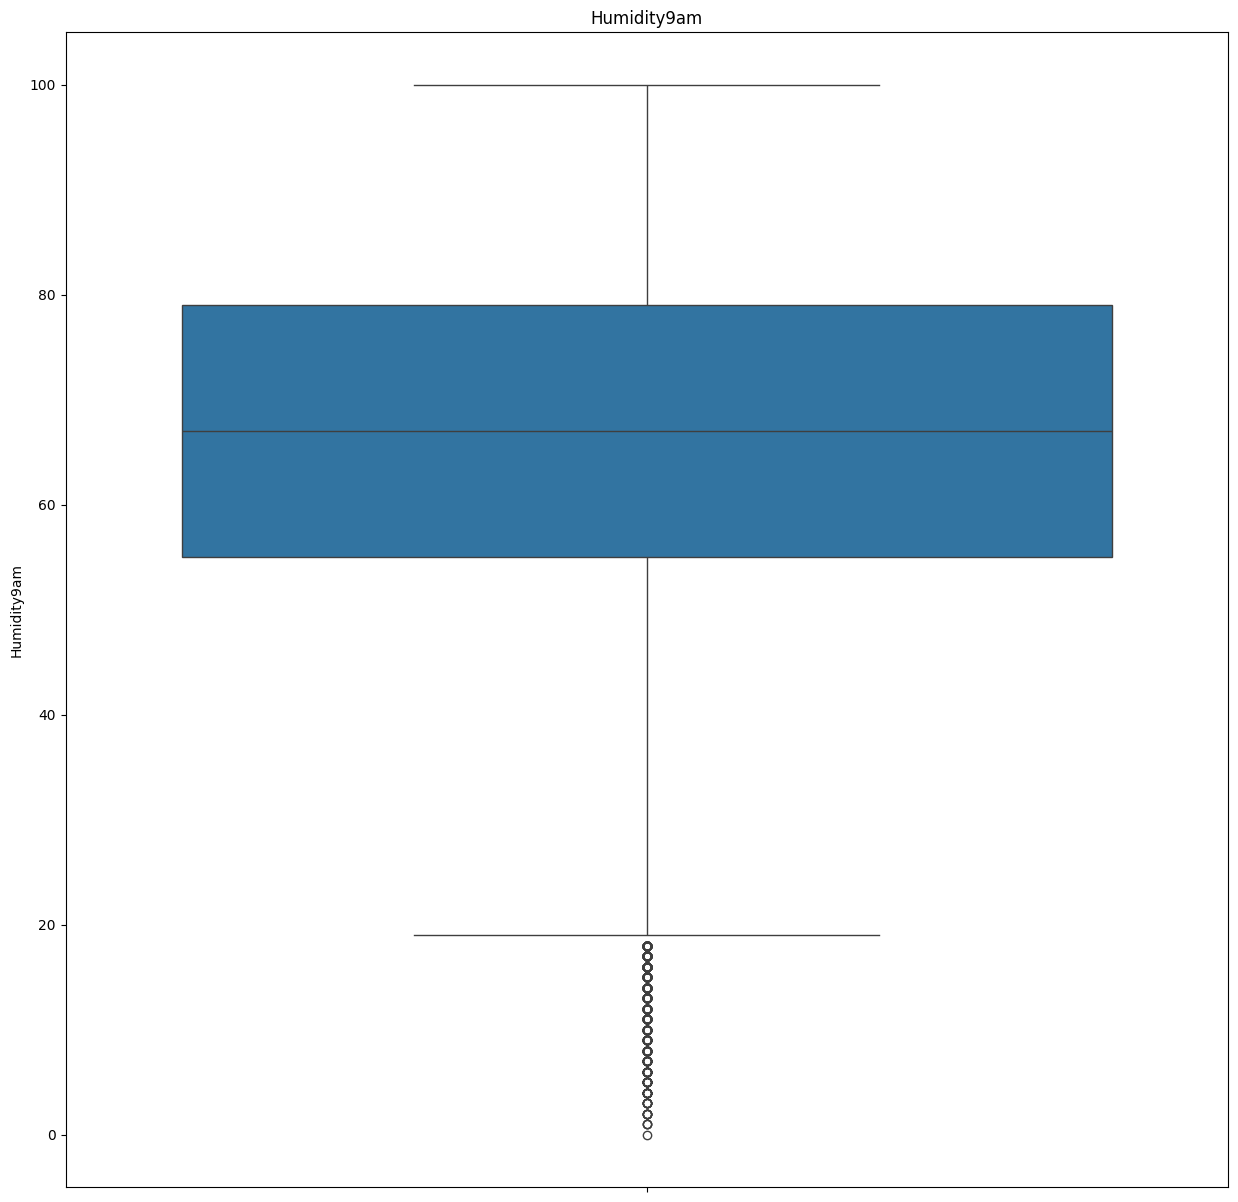

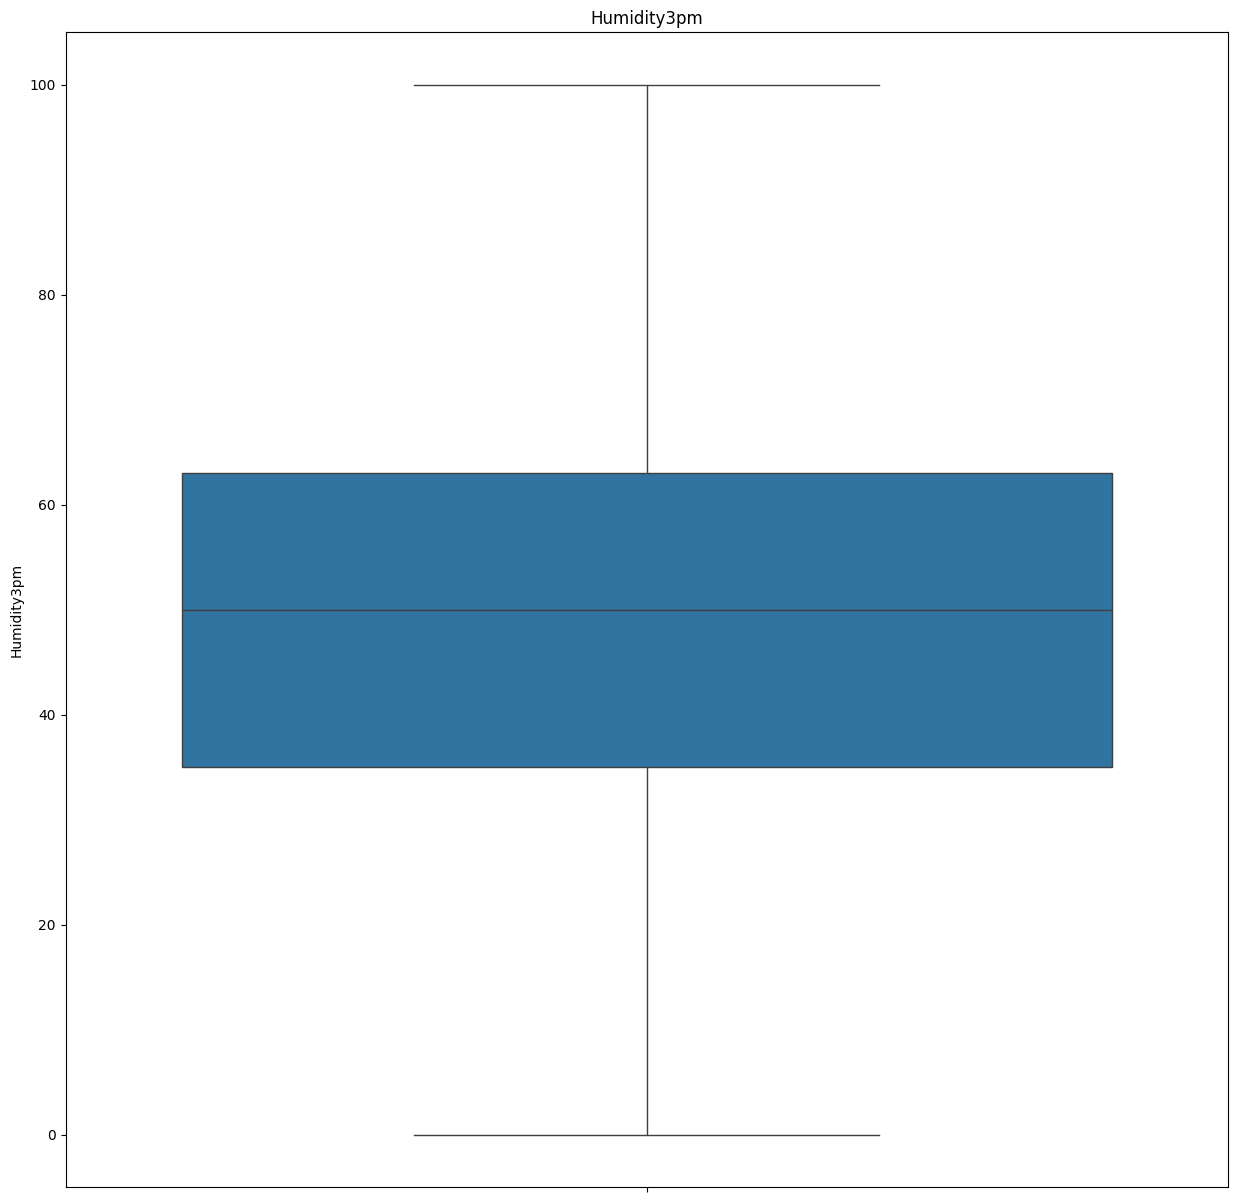

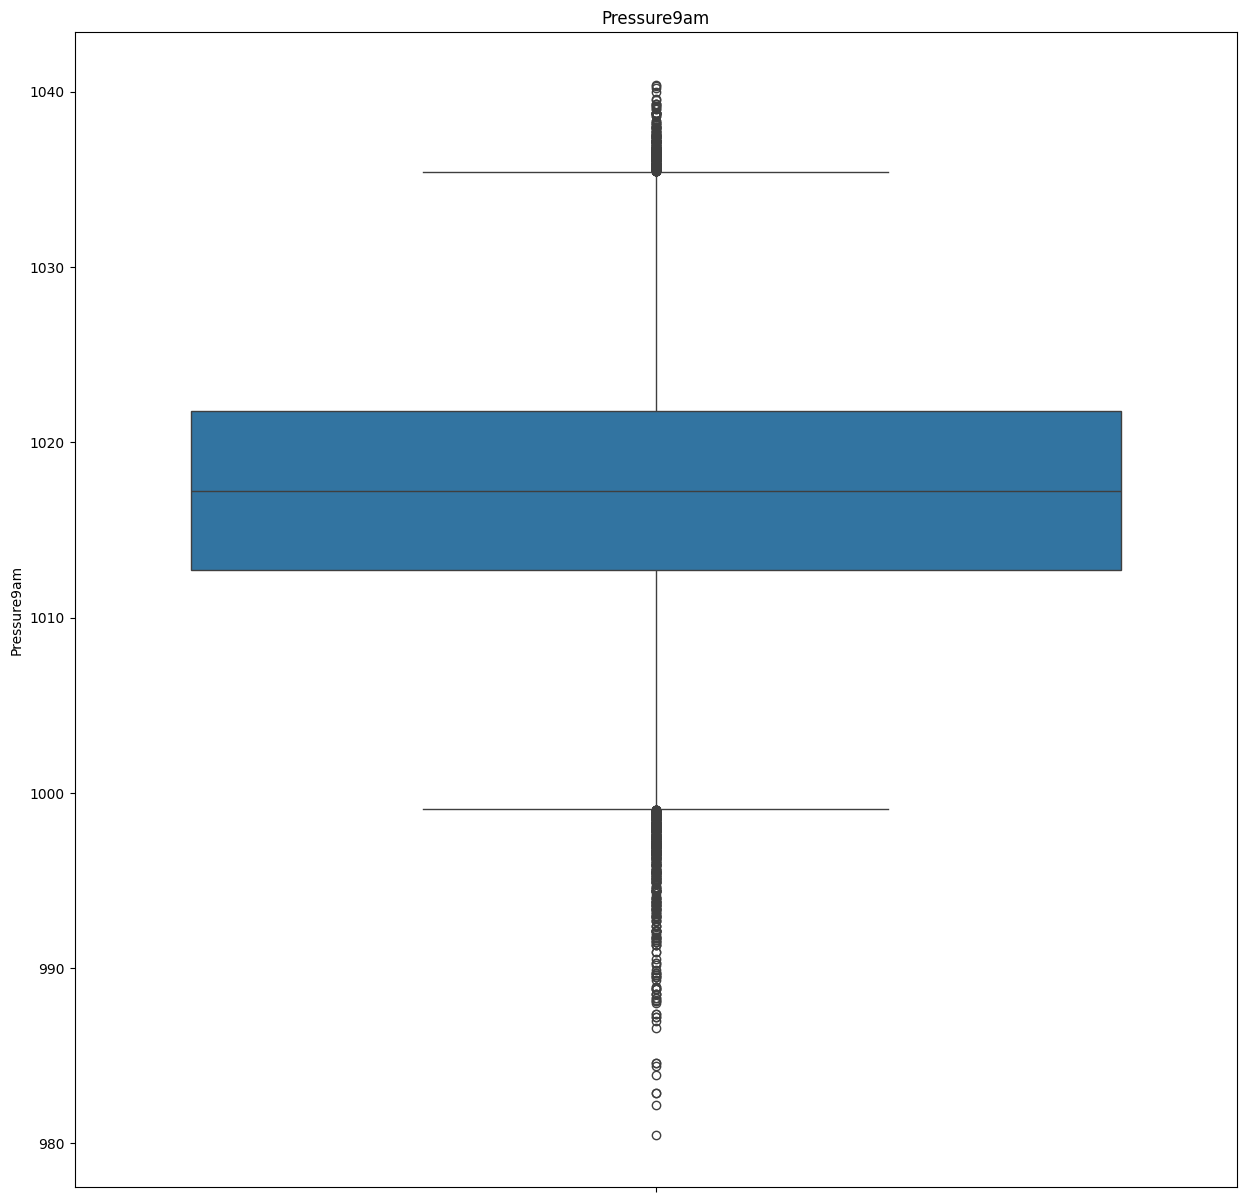

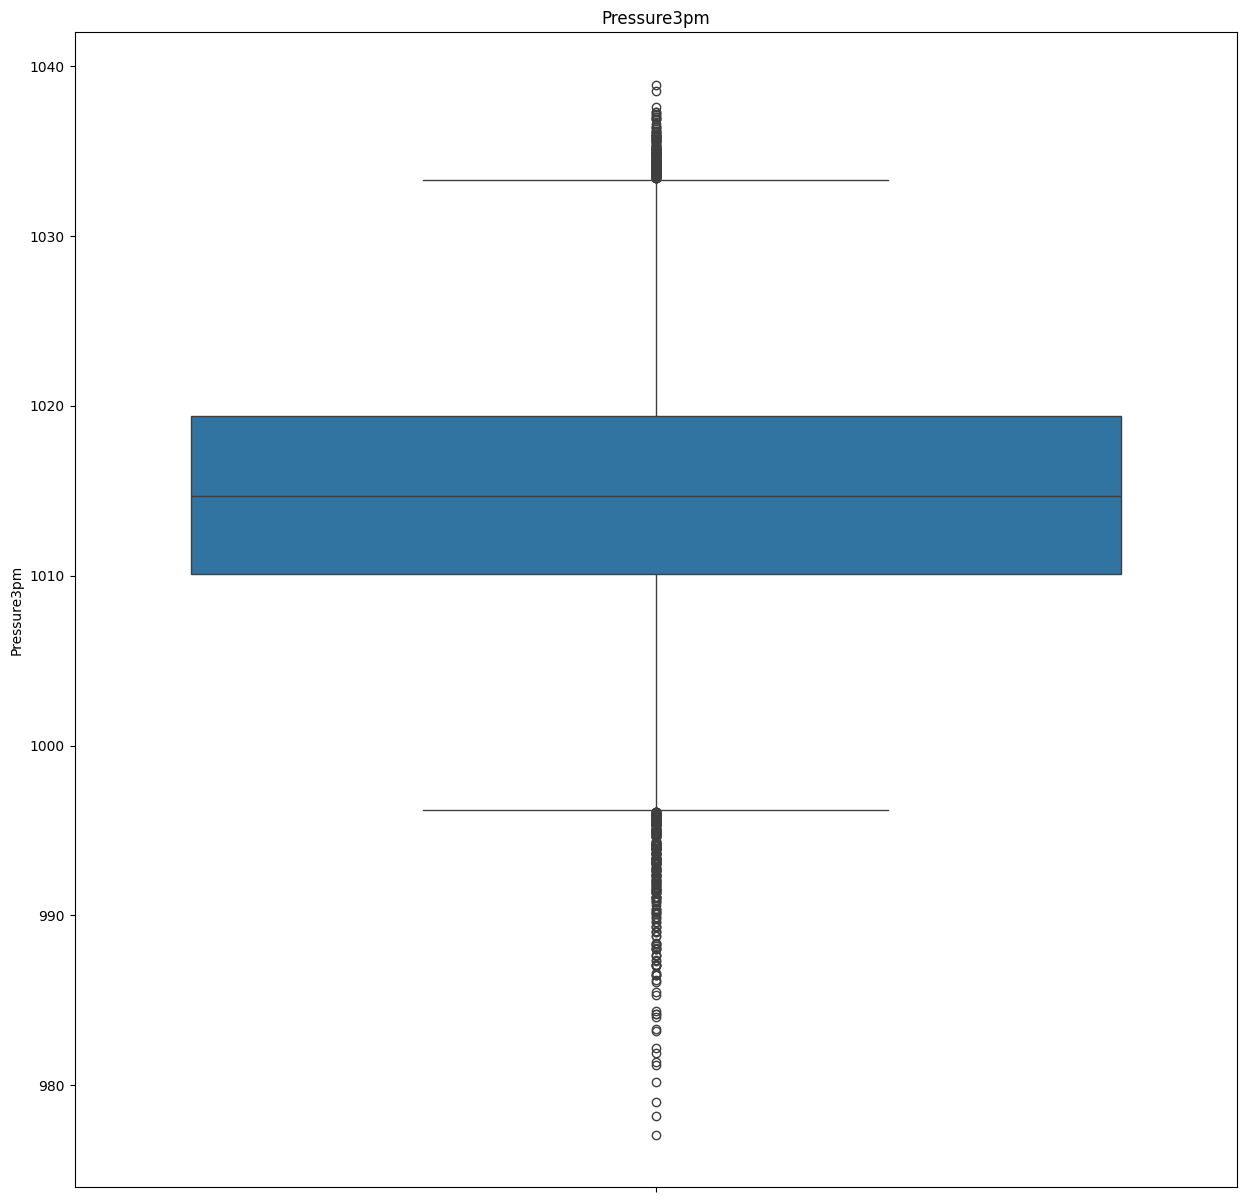

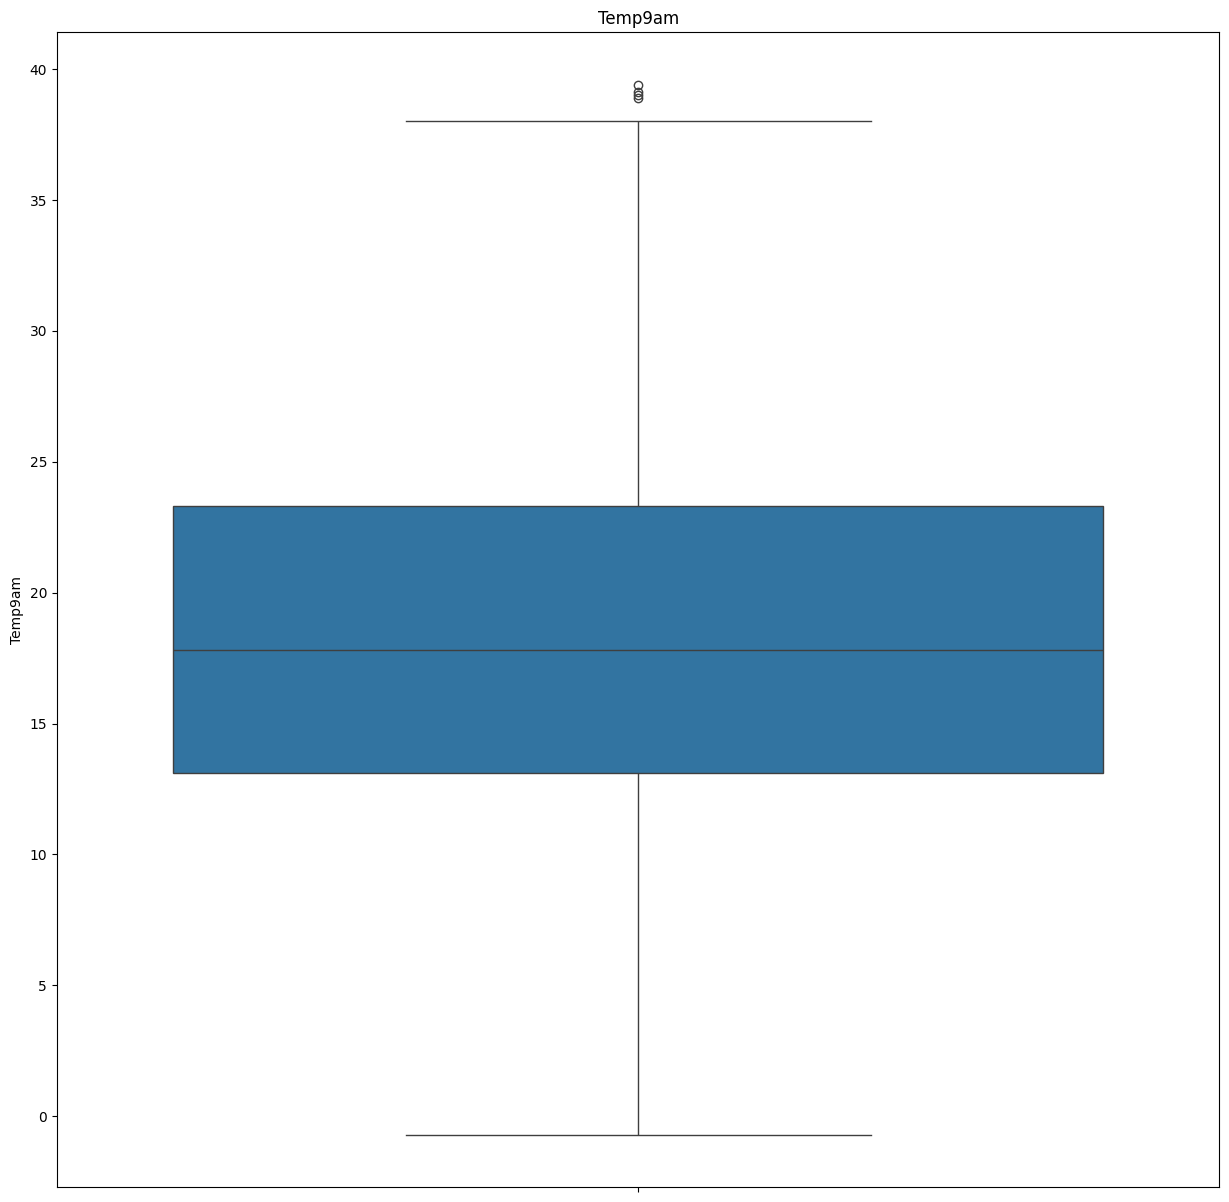

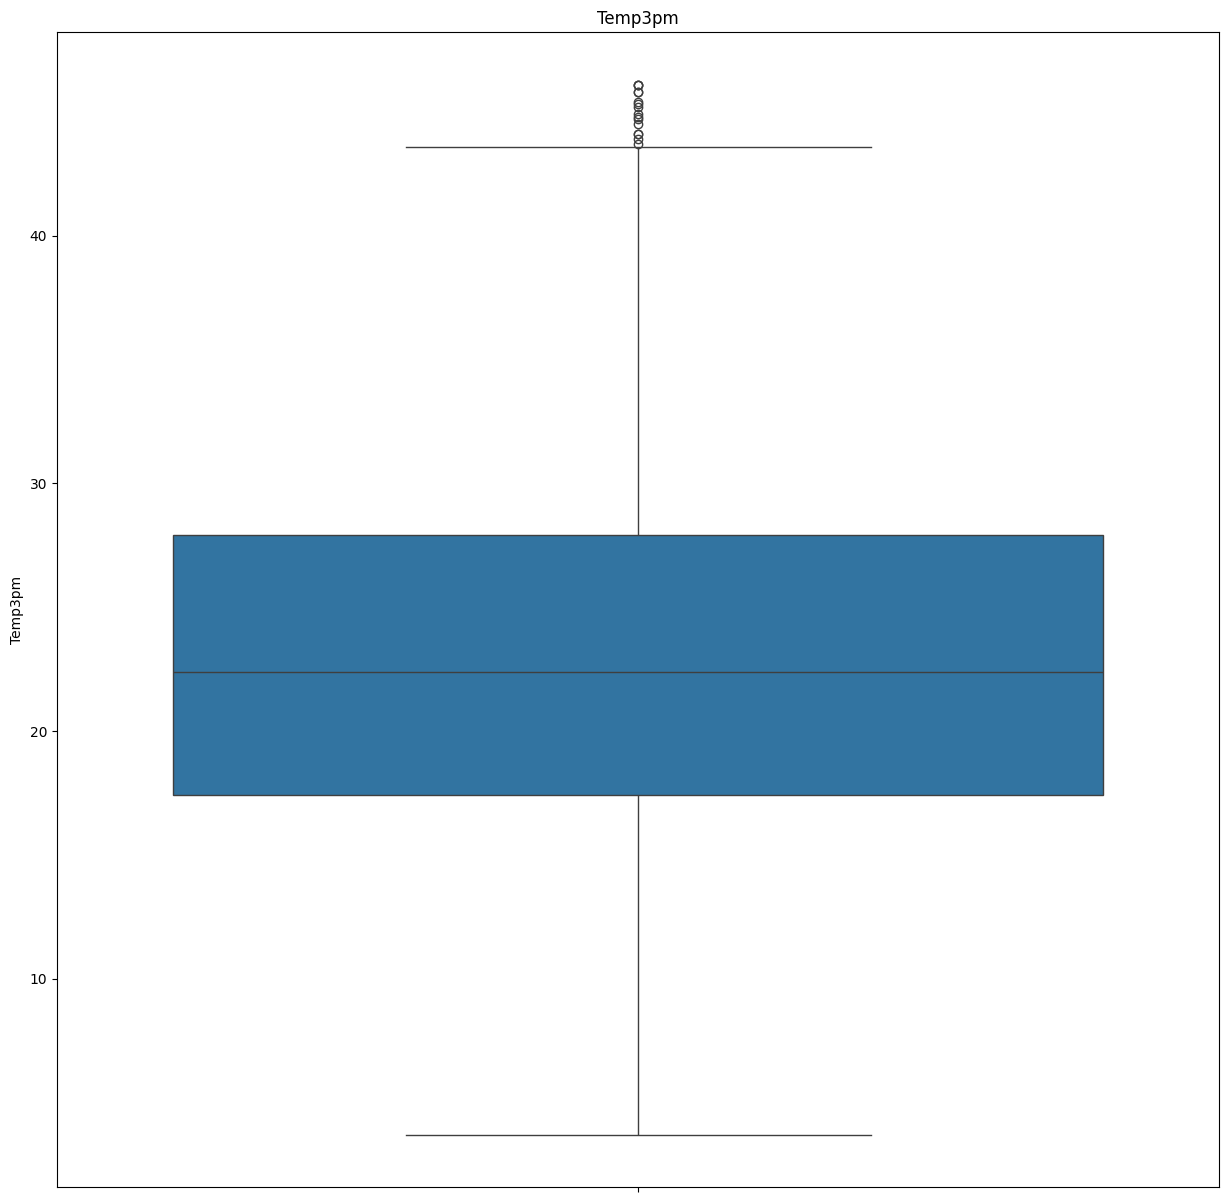

<Figure size 1500x1500 with 0 Axes>

In [103]:
for feature in continuous_feature:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [104]:
# @title Feature Transformation
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

MinTemp


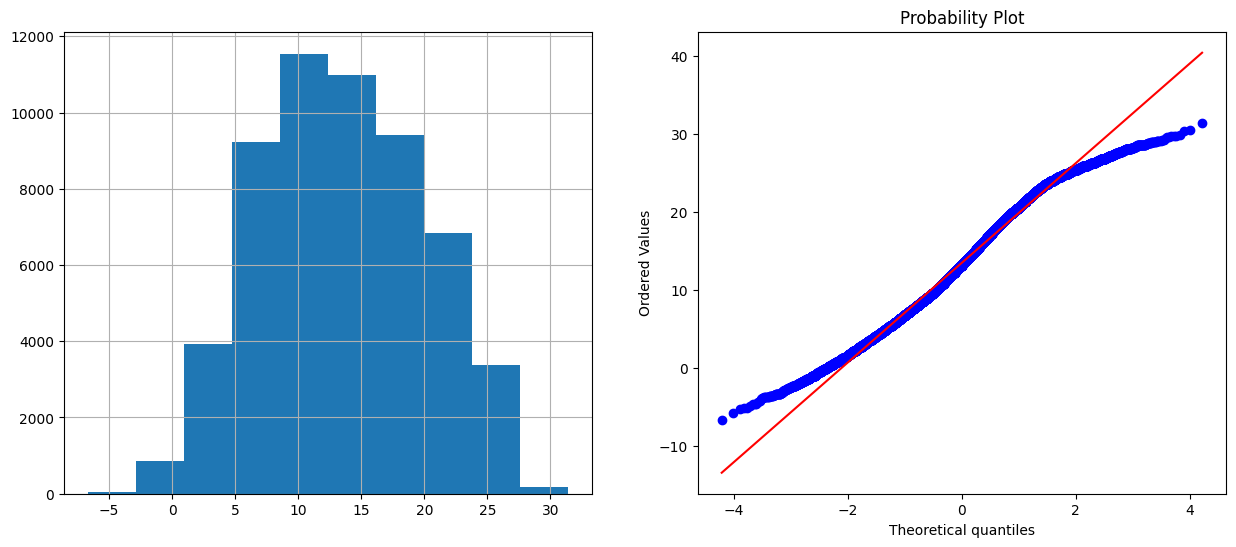

MaxTemp


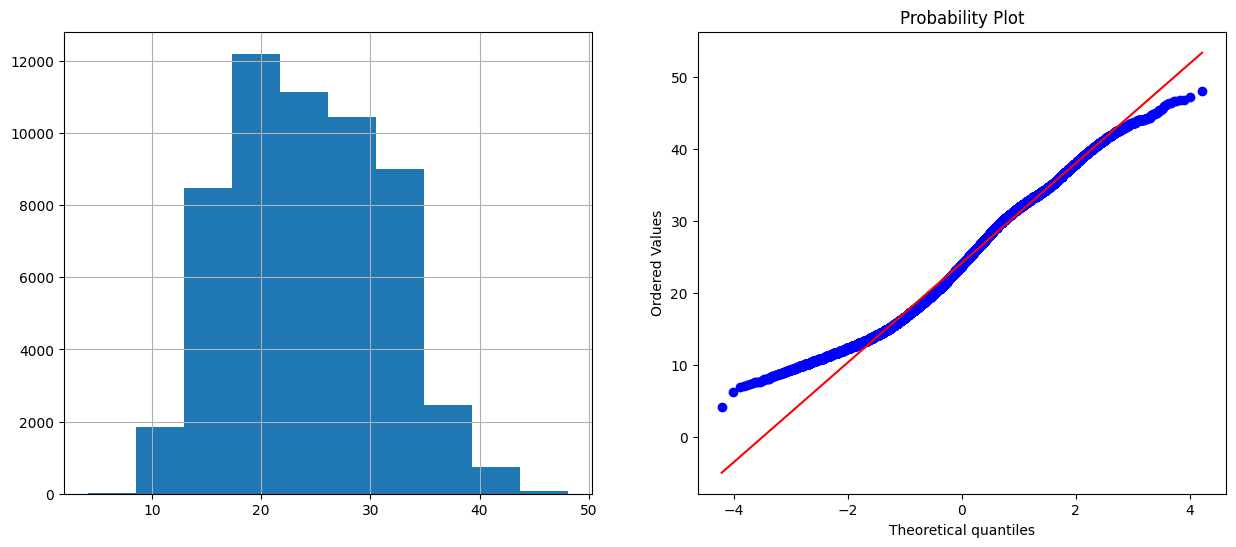

Rainfall


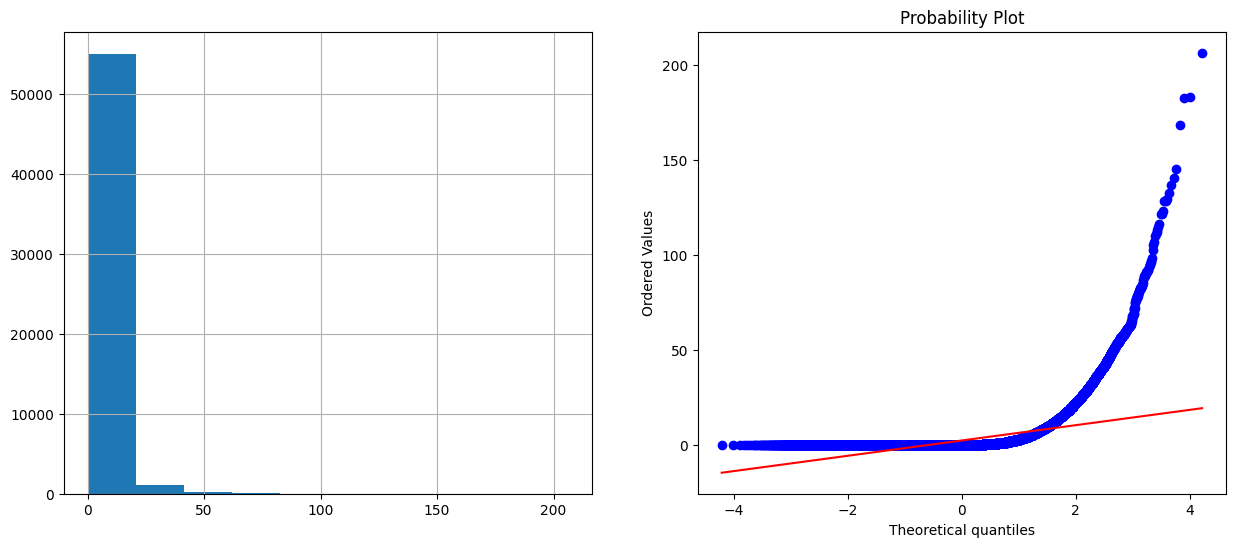

Evaporation


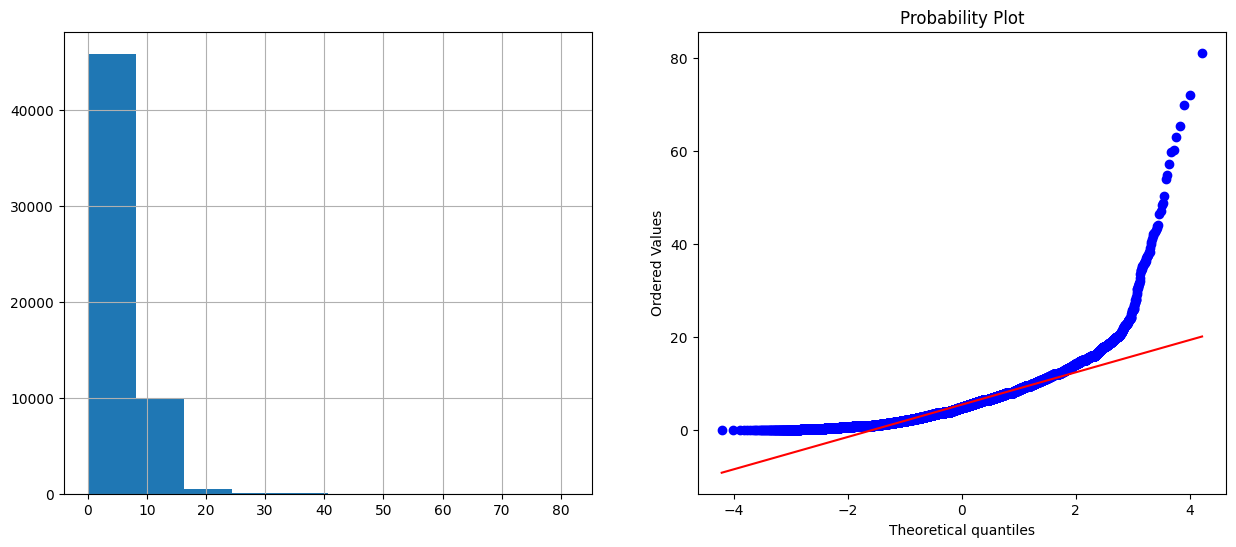

Sunshine


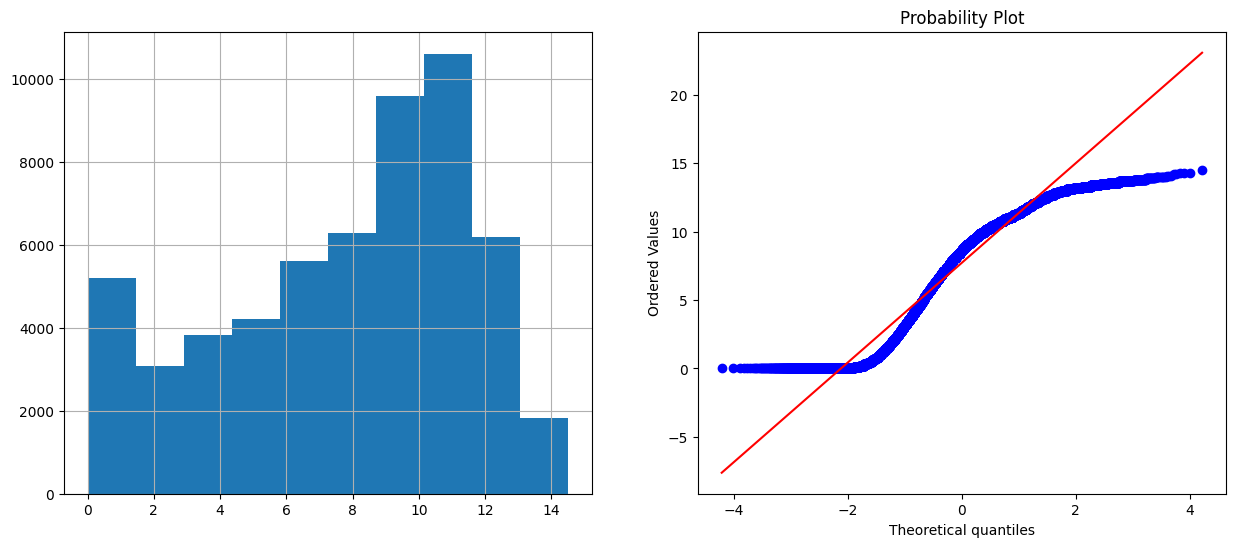

WindGustSpeed


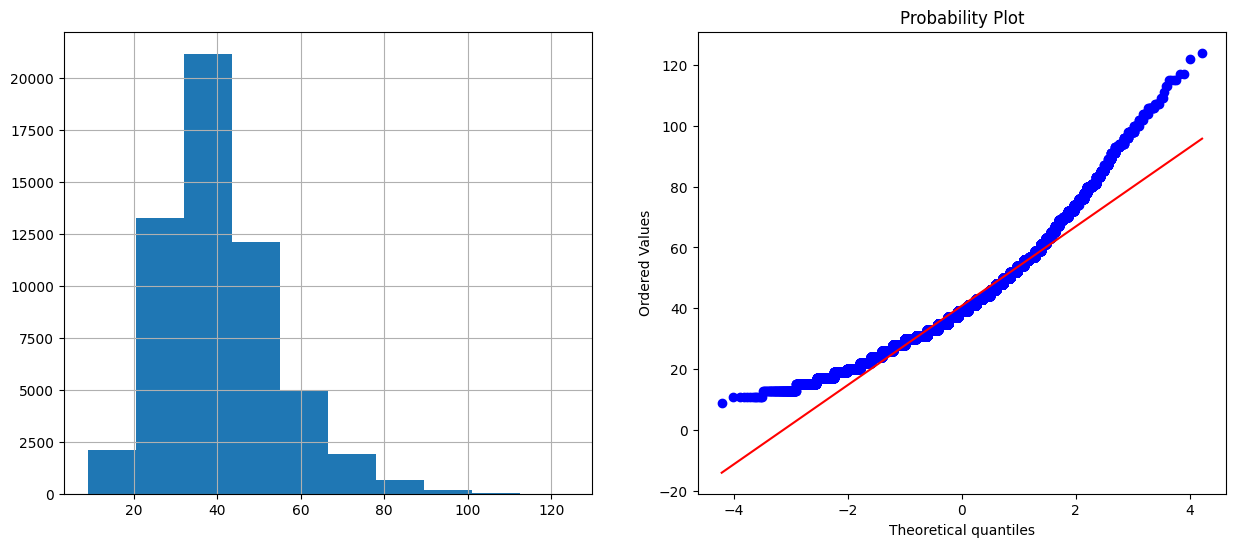

WindSpeed9am


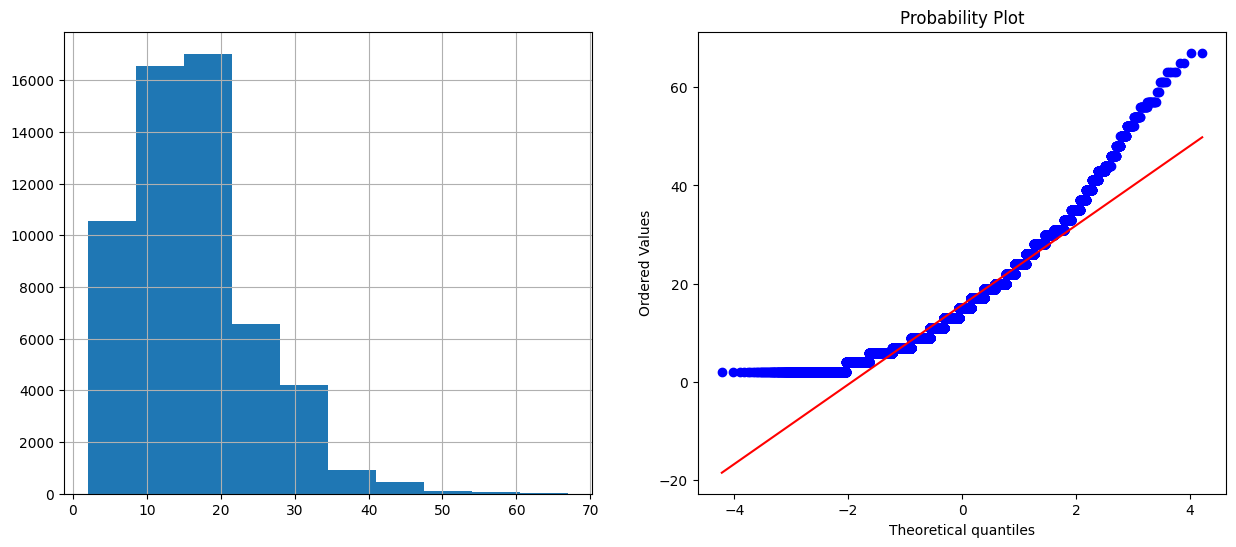

WindSpeed3pm


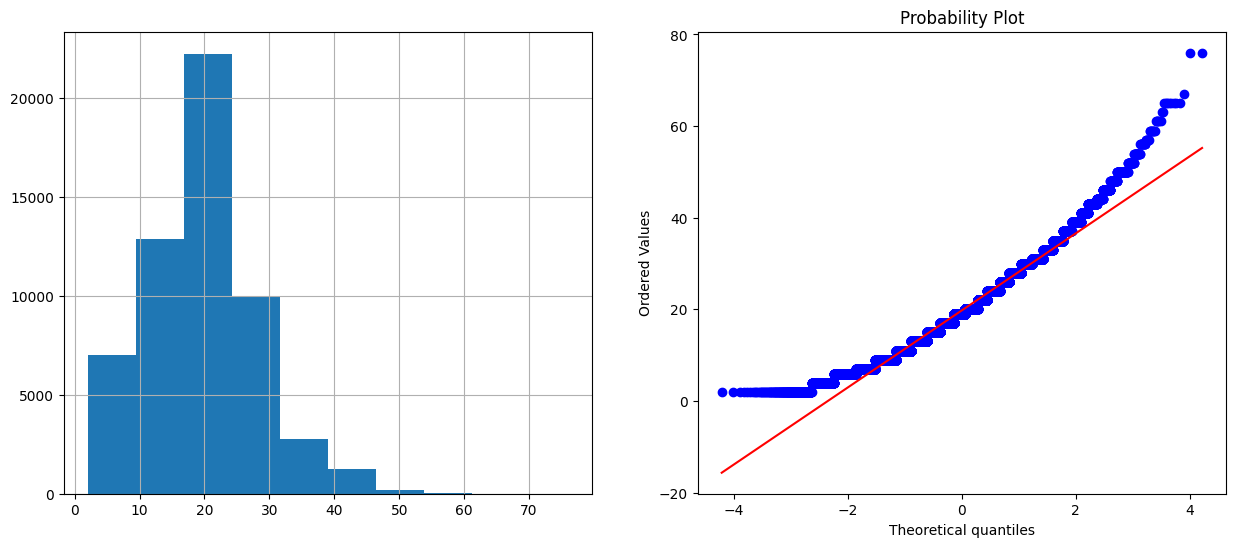

Humidity9am


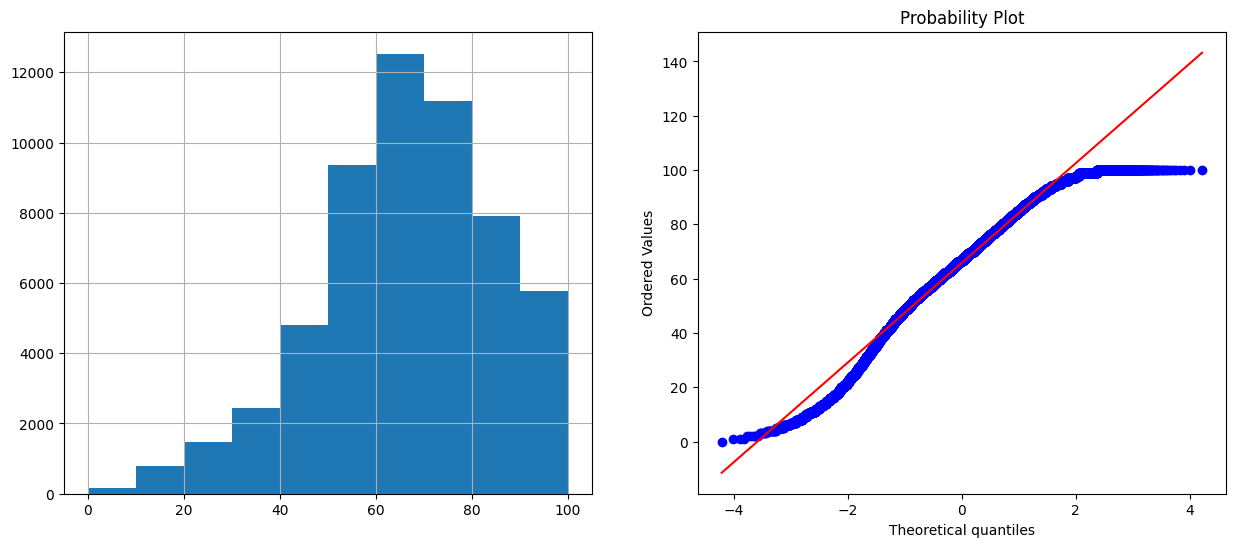

Humidity3pm


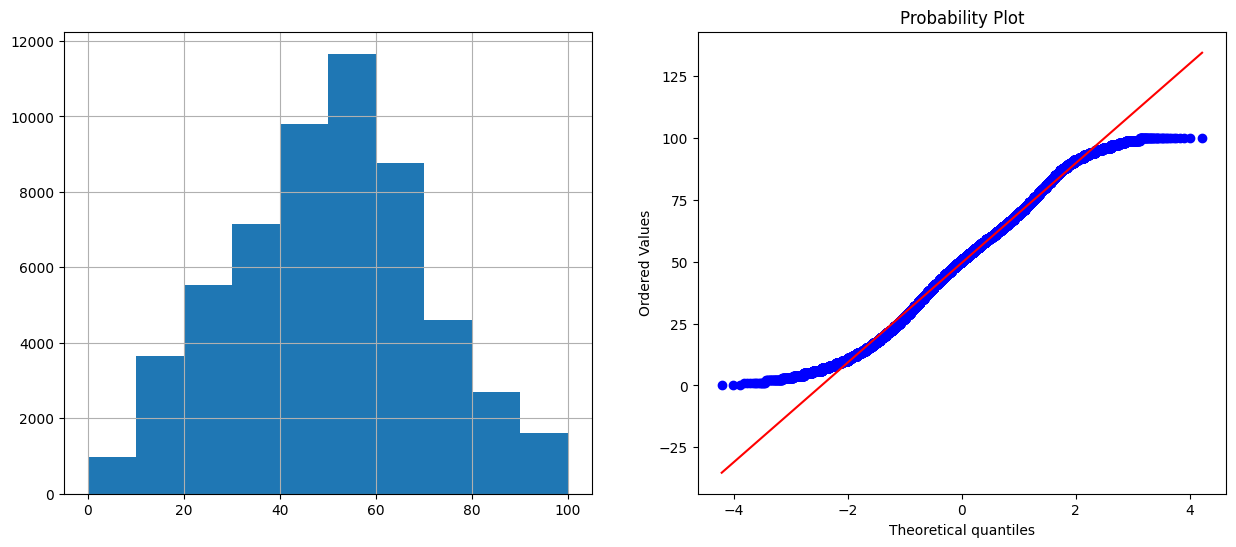

Pressure9am


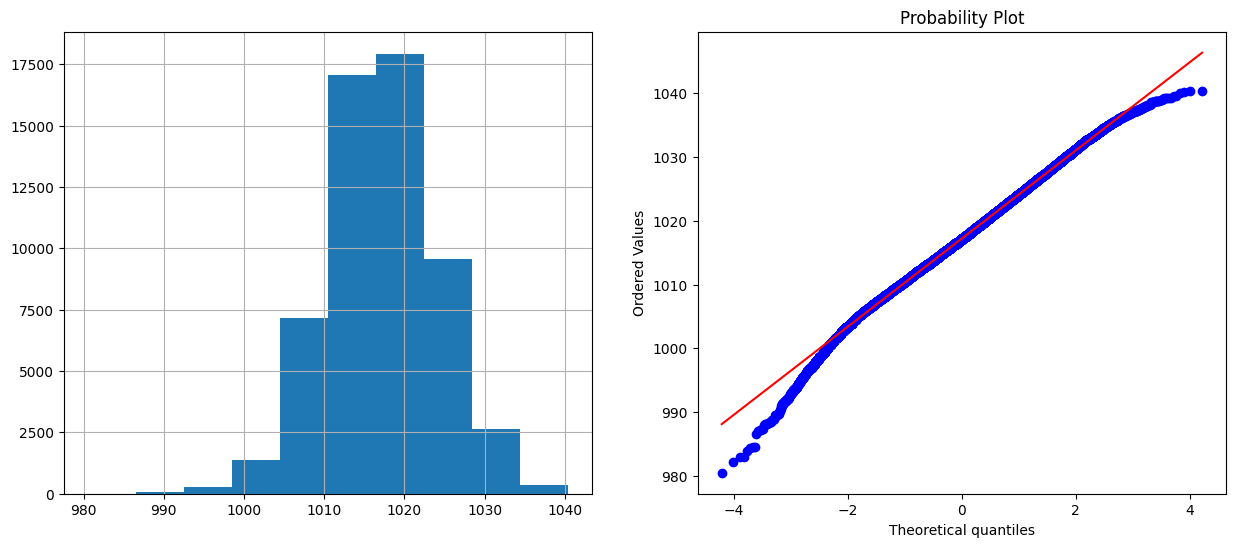

Pressure3pm


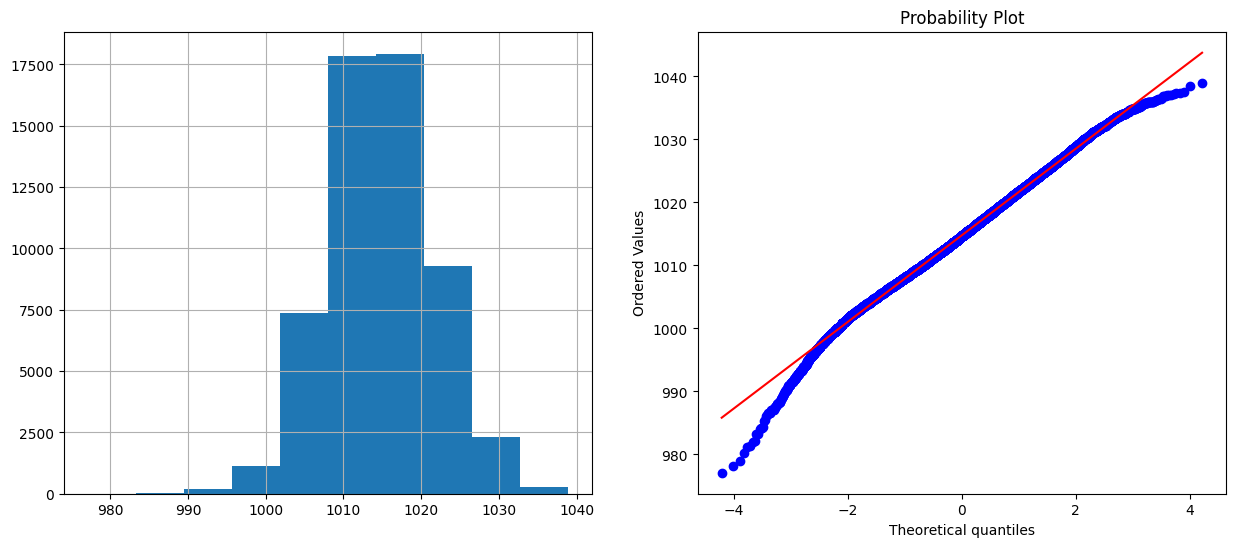

Temp9am


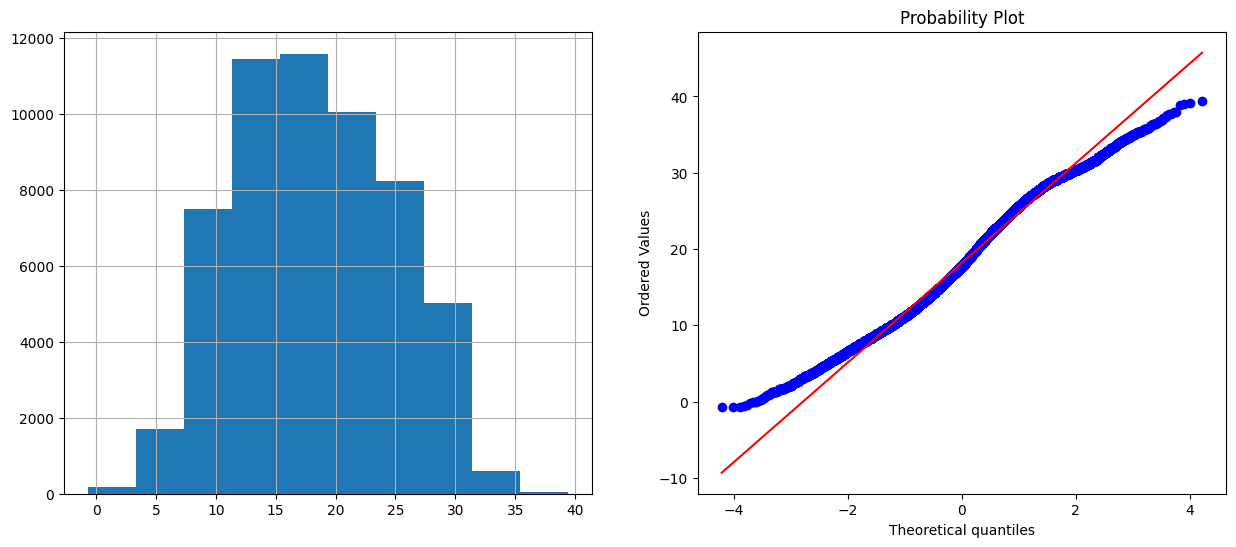

Temp3pm


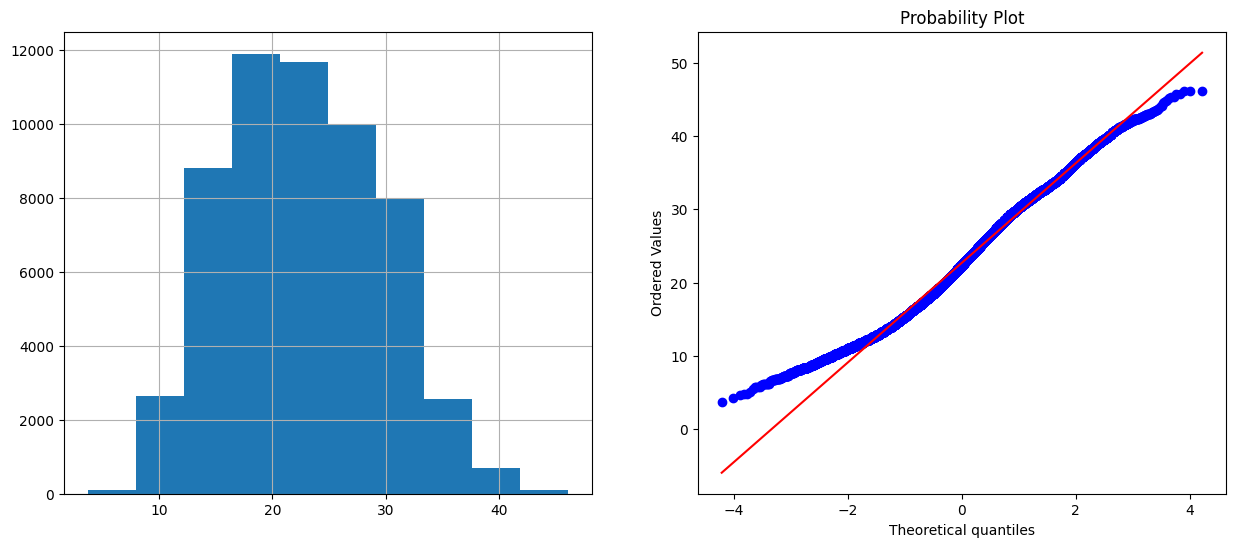

In [105]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [106]:
df.corr()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
Date,1.000000,-0.055381,0.048743,0.030813,-0.014134,0.043027,0.008583,0.004385,-0.013767,-0.012689,0.013188,-0.014623,-0.023544,-0.023821,0.002700,0.036972,0.036870,-0.003380,-0.015967,0.043517,0.026523,-0.004840,-0.005977,0.009428,0.008595
Location,-0.055381,1.000000,-0.146144,0.139633,-0.105028,0.250813,0.165778,0.056351,-0.032248,0.106122,-0.026189,-0.018413,-0.114013,-0.285646,-0.440490,0.069021,0.027490,-0.213413,-0.165286,-0.039302,0.152084,-0.162697,-0.161183,-0.007087,-0.003311
MinTemp,0.048743,-0.146144,1.000000,0.749687,0.110800,0.506764,0.076087,0.222044,0.118054,0.195342,0.170180,0.108522,0.137273,-0.174991,0.070827,-0.475661,-0.495577,0.106177,0.042173,0.906295,0.727222,0.048953,0.087428,-0.191405,0.000160
MaxTemp,0.030813,0.139633,0.749687,1.000000,-0.069981,0.650964,0.463913,0.204657,0.035531,0.230890,0.092713,-0.008171,0.012266,-0.495781,-0.448116,-0.350980,-0.451691,-0.263634,-0.257752,0.893387,0.984841,-0.221810,-0.147467,-0.160873,0.000365
Rainfall,-0.014134,-0.105028,0.110800,-0.069981,1.000000,-0.077239,-0.246379,-0.015310,0.106308,-0.008678,-0.005006,0.050584,0.044112,0.263625,0.277625,-0.180606,-0.137302,0.217169,0.191433,0.013713,-0.074627,0.550515,0.254342,-0.033498,0.006651
Evaporation,0.043027,0.250813,0.506764,0.650964,-0.077239,1.000000,0.369250,0.168033,0.209566,0.190507,0.110799,0.193154,0.124345,-0.554232,-0.422436,-0.297319,-0.325954,-0.199809,-0.202366,0.593122,0.630727,-0.218079,-0.130002,-0.045118,-0.012605
Sunshine,0.008583,0.165778,0.076087,0.463913,-0.246379,0.369250,1.000000,0.138268,-0.052422,0.164061,0.077414,-0.013842,0.029200,-0.500343,-0.629299,0.043330,-0.020632,-0.677939,-0.702022,0.289038,0.486129,-0.328904,-0.453407,0.030539,-0.002696
WindGustDir,0.004385,0.056351,0.222044,0.204657,-0.015310,0.168033,0.138268,1.000000,-0.187983,0.551234,0.640969,-0.056210,-0.102208,-0.074697,-0.021968,0.176116,0.153787,-0.075962,-0.133115,0.235351,0.214502,-0.070255,-0.110127,-0.087366,-0.020446
WindGustSpeed,-0.013767,-0.032248,0.118054,0.035531,0.106308,0.209566,-0.052422,-0.187983,1.000000,-0.190865,-0.185578,0.608852,0.685236,-0.193410,-0.042653,-0.430363,-0.383683,0.088129,0.131590,0.085520,-0.000382,0.146276,0.233158,0.043544,-0.012689
WindDir9am,-0.012689,0.106122,0.195342,0.230890,-0.008678,0.190507,0.164061,0.551234,-0.190865,1.000000,0.431097,-0.050612,-0.140853,-0.097566,-0.115076,0.132545,0.105269,-0.090312,-0.148962,0.211529,0.247186,-0.075836,-0.129472,-0.067391,-0.018309


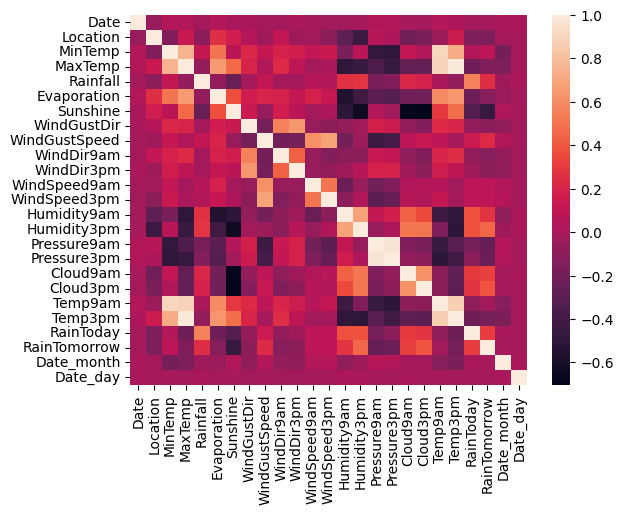

In [107]:
# prompt: how to display heatmap
cor = df.corr()
import seaborn as sns
# Create a heatmap of the correlation matrix
sns.heatmap(data=cor, xticklabels=cor.columns.values, yticklabels=cor.columns.values)
plt.show()


In [108]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
6049,2009-01-01,43,17.9,35.2,0.0,12.0,12.3,8,48.0,12,9,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,1,1
6050,2009-01-02,43,18.4,28.9,0.0,14.8,13.0,7,37.0,11,12,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,1,2
6052,2009-01-04,43,19.4,37.6,0.0,10.8,10.6,6,46.0,3,1,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,1,4
6053,2009-01-05,43,21.9,38.4,0.0,11.4,12.2,2,31.0,4,6,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,1,5
6054,2009-01-06,43,24.2,41.0,0.0,11.2,8.4,2,35.0,2,3,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,1,6


In [109]:
# prompt: drop date month ,date day

df = df.drop('Date_month', axis=1)
df = df.drop('Date_day', axis=1)


In [110]:
len(df)

56420

In [111]:
len(df.columns)

23

In [112]:
df=data.sample(n=12000)

In [113]:
# @title Dividing the dataset into Independent and Dependent features
x = df.drop(["RainTomorrow","Date"], axis=1)
y = df["RainTomorrow"]

In [114]:
names=x.columns


In [115]:
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Date_month', 'Date_day'],
      dtype='object')

In [116]:
from sklearn.preprocessing import StandardScaler # Make sure to import the class

sc = StandardScaler() # Instantiate the StandardScaler object with correct capitalization
x = sc.fit_transform(x)

In [117]:
ss = sc.feature_names_in_

In [118]:
x = pd.DataFrame(x, columns=names)

In [119]:
xc = x.columns

In [120]:
# @title Train test split
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y, test_size =0.2, random_state = 0)

In [121]:
y_train


,RainTomorrow
80740,0
32613,0
64435,0
68158,0
85146,0
...,...
141446,1
106909,0
14111,0
94003,1


In [122]:
x_train.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Date_month', 'Date_day'],
      dtype='object')

In [123]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0


In [124]:
!pip install xgboost
import xgboost
import sklearn.ensemble  # Import the sklearn.ensemble module
import sklearn.svm
import sklearn.tree
import sklearn.linear_model

In [125]:
# @title Dividing the dataset into Independent and Dependent features
x = df.drop(["RainTomorrow", "Date"], axis=1)
y = df["RainTomorrow"]

In [126]:
# @title Train test split
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y, test_size =0.2, random_state = 0)

In [127]:
c = x_train.columns

In [128]:
len(x_train.columns)

23

In [129]:
names = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall','Evaporation','Sunshine', 'WindGustDir',
             'WindGustSpeed','WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
             'Pressure9am', 'Pressure3pm', 'Cloud9am','Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'Date_month', 'Date_day']
len(names)

23

In [130]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
61665,2010-04-29,27,12.5,18.2,0.0,4.6,5.9,4,69.0,5,4,33.0,35.0,67.0,53.0,1017.7,1018.4,4.0,7.0,15.3,17.6,0,0,4,29
34098,2010-08-02,16,8.5,15.7,0.2,4.0,7.3,9,80.0,5,4,22.0,37.0,42.0,38.0,1016.0,1011.8,6.0,6.0,13.0,15.0,0,1,8,2
80635,2016-06-28,18,3.1,14.3,1.2,0.6,6.1,6,30.0,3,1,7.0,15.0,93.0,74.0,1023.8,1024.0,1.0,5.0,8.7,13.1,1,0,6,28
75008,2009-01-29,1,18.3,39.3,0.0,13.8,11.4,4,59.0,1,4,19.0,28.0,33.0,21.0,1006.9,1007.8,2.0,7.0,31.3,36.5,0,0,1,29
39033,2016-02-07,38,17.1,31.2,0.0,9.6,13.2,7,33.0,9,10,13.0,13.0,59.0,35.0,1017.5,1014.8,1.0,1.0,21.0,29.2,0,0,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87594,2009-12-30,2,24.4,33.1,3.0,5.4,10.1,11,37.0,11,11,13.0,20.0,71.0,61.0,1011.4,1007.6,7.0,6.0,29.1,32.3,1,1,12,30
68952,2013-07-16,28,10.6,16.7,0.0,1.4,4.9,6,37.0,1,2,17.0,24.0,89.0,63.0,1023.0,1020.9,3.0,7.0,11.4,16.1,0,0,7,16
104265,2013-12-07,32,12.0,30.5,0.0,4.0,9.2,3,41.0,9,1,20.0,11.0,57.0,17.0,1019.3,1015.1,6.0,6.0,17.7,29.1,0,0,12,7
104270,2013-12-12,32,10.9,21.8,0.0,5.8,9.5,5,46.0,6,9,19.0,19.0,63.0,44.0,1015.7,1014.3,8.0,5.0,15.5,21.3,0,0,12,12


In [131]:
names=c

In [132]:
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = sklearn.ensemble. RandomForestClassifier()
svm = sklearn.svm.SVC()
Dtree = sklearn.tree. DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

In [133]:
XGBoost.fit(x_train,y_train)
Rand_forest.fit(x_train,y_train)
svm.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
GBM.fit(x_train, y_train)
log.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [134]:
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
p3 = svm.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)



In [135]:
from sklearn import metrics

In [136]:
print("xgboost:",metrics.accuracy_score(y_train,p1))
print("rand_forestt:",metrics.accuracy_score(y_train,p1))
print("svm:",metrics.accuracy_score(y_train,p1))
print("Dtree:",metrics.accuracy_score(y_train,p1))
print("GBM:",metrics.accuracy_score(y_train,p1))
print("log:",metrics.accuracy_score(y_train,p1))



xgboost: 0.8676041666666666
rand_forestt: 0.8676041666666666
svm: 0.8676041666666666
Dtree: 0.8676041666666666
GBM: 0.8676041666666666
log: 0.8676041666666666


In [137]:
model = XGBoost
y_pred = model.predict(x_test)  # Generate predictions using the test set

conf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [138]:
conf_matrix

array([[1806,  117],
       [ 234,  243]])

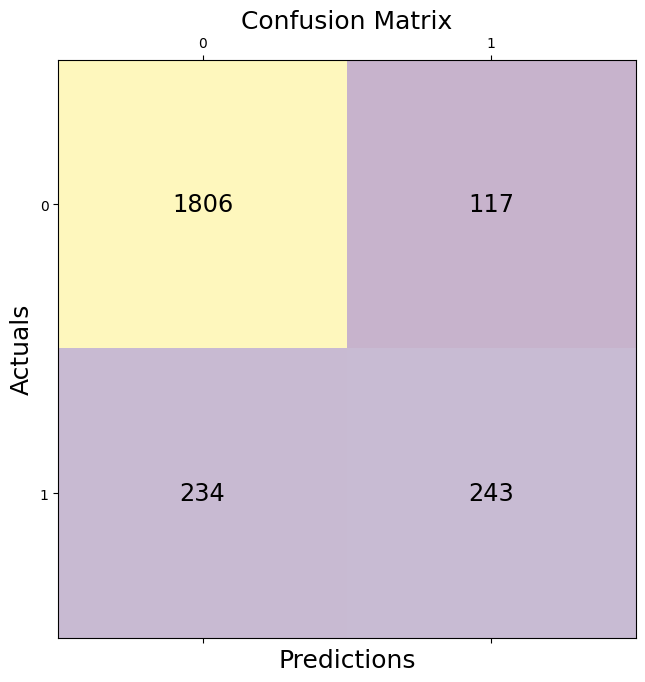

In [139]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [140]:
import pickle

In [141]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Assuming you need a LabelEncoder, create one
le = LabelEncoder()

In [142]:
# prompt: name 'imp_mode' is not defined

imp_mode = []
for i in range(len(x_train.columns)):
    imp_mode.append(x_train.iloc[:, i].mode()[0])


In [143]:
pickle.dump(model,open('rainfall.pkl1','wb'))
pickle.dump(sc,open('scale.pkl1','wb'))